<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<font size="10"><b>Titanic-Machine_Learning_from_Disaster</b></font>

# START

## UNDERSTENDING DATA

In [365]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import re

from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import RandomState
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve, confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from catboost import CatBoostClassifier , cv, Pool
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [366]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
passenger_id = test.iloc[:,0].values

In [367]:
print('This is train dataset\n')
train.head()

This is train dataset



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [368]:
print('This is test dataset\n')
test.head()

This is test dataset



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [369]:
print('This is info about train dataset\n\n')
train.info()

This is info about train dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [370]:
print('This is info about test dataset\n\n')
test.info()

This is info about test dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## PREPROCESSING

### RENAME COLUMNS

In [371]:
def give_correct_name_for_columns(df):
    
    print('\n===Old columns name===')
    print()
    print(df.columns)
    new_names = []
    old_names = df.columns
    for old_name in old_names:
        index_second_capital_letter = re.search(r'^([^A-Z]*[A-Z]){2}', old_name)
        if index_second_capital_letter is not None:
            new_name = old_name[:(index_second_capital_letter.span()[1] - 1)] + '_' + old_name[(index_second_capital_letter.span()[1] - 1):]
            new_names.append(new_name.lower())
        else:
            new_names.append(old_name.lower())

    print('\n\n=== New columns name=== \n\n', new_names)

    for i in range(len(df.columns)):
        df.rename(columns={f'{old_names[i]}' : f'{new_names[i]}'}, inplace=True)
    return df

In [372]:
train = give_correct_name_for_columns(train)
print('\n\n=== Updated columns name=== \n\n')
train.head()


===Old columns name===

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


=== New columns name=== 

 ['passenger_id', 'survived', 'pclass', 'name', 'sex', 'age', 'sib_sp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


=== Updated columns name=== 




,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [373]:
test = give_correct_name_for_columns(test)
print('\n\n=== Updated columns name=== \n\n')
test.head()


===Old columns name===

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


=== New columns name=== 

 ['passenger_id', 'pclass', 'name', 'sex', 'age', 'sib_sp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


=== Updated columns name=== 




,passenger_id,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### TEXT TO LOWER CASE

In [374]:
def str_to_lower(df):
    for column in df.columns:
        if (df[column].dtype == 'object'):
            df[column] = df[column].str.lower()
    return df

In [375]:
train = str_to_lower(train)
test = str_to_lower(test)

In [376]:
train.head()

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,NaN,s
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,s


In [377]:
test.head()

,passenger_id,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,892,3,"kelly, mr. james",male,34.5,0,0,330911,7.8292,NaN,q
1,893,3,"wilkes, mrs. james (ellen needs)",female,47.0,1,0,363272,7.0000,NaN,s
2,894,2,"myles, mr. thomas francis",male,62.0,0,0,240276,9.6875,NaN,q
3,895,3,"wirz, mr. albert",male,27.0,0,0,315154,8.6625,NaN,s
4,896,3,"hirvonen, mrs. alexander (helga e lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,s


In [378]:
del give_correct_name_for_columns, str_to_lower

### DUPLICATES

In [379]:
print('Duplicates in train -',train.duplicated().sum())
print('\nDuplicates in test -',test.duplicated().sum())

Duplicates in train - 0

Duplicates in test - 0


### FOR NAN IN AGE

In [380]:
train['name'].head()

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                               heikkinen, miss. laina
3         futrelle, mrs. jacques heath (lily may peel)
4                             allen, mr. william henry
Name: name, dtype: object

In [381]:
def give_title(row):
    title = str(re.split(r'[,.]+', row['name'])[1])
    return title[1:]

train['title'] = train.apply(give_title, axis=1)
test['title'] = test.apply(give_title, axis=1)

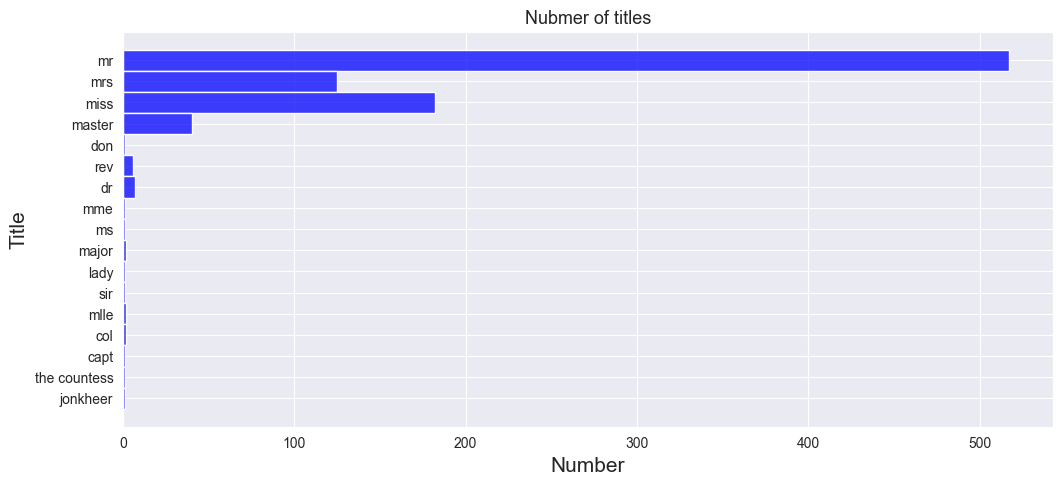

In [382]:
position = 0
plt.figure(figsize=[12, 5])
plt.subplots_adjust(top=0.90, wspace=0.5, hspace=0.90)
plt.title(f'Nubmer of titles', fontsize=13)
sns.set_style('darkgrid')
sns.histplot(y=train['title'], color='b', kde=False);
plt.ylabel('Title', fontsize=15)
plt.xlabel('Number', fontsize=15)
plt.grid(True);

In [383]:
train.replace(['mlle', 'ms'], 'miss', inplace=True)
train.replace(['mme'], 'mrs', inplace=True)
test.replace(['mlle', 'ms'], 'miss', inplace=True)
test.replace(['mme'], 'mrs', inplace=True)

In [384]:
print('TITLE FOR TRAIN: ', train['title'].unique())
print()
print('TITLE FOR TEST: ',test['title'].unique())

TITLE FOR TRAIN:  ['mr' 'mrs' 'miss' 'master' 'don' 'rev' 'dr' 'major' 'lady' 'sir' 'col'
 'capt' 'the countess' 'jonkheer']

TITLE FOR TEST:  ['mr' 'mrs' 'miss' 'master' 'col' 'rev' 'dr' 'dona']


In [385]:
# train[train['age'].isna()].style.highlight_null(na_rep='red')

In [386]:
for title in train['title'].unique():
    number_of_nan = len(train[(train['title'] == title) & (train['age'].isna())])
    if  number_of_nan != 0:
        print(f'\nTitle with NAN in age for Train - {title}, number of nan - {number_of_nan}')


Title with NAN in age for Train - mr, number of nan - 119

Title with NAN in age for Train - mrs, number of nan - 17

Title with NAN in age for Train - miss, number of nan - 36

Title with NAN in age for Train - master, number of nan - 4

Title with NAN in age for Train - dr, number of nan - 1


In [387]:
for title in test['title'].unique():
    number_of_nan = len(test[(test['title'] == title) & (test['age'].isna())])
    if  number_of_nan != 0:
        print(f'\nTitle with NAN in age for Test - {title}, number of nan - {number_of_nan}')


Title with NAN in age for Test - mr, number of nan - 57

Title with NAN in age for Test - mrs, number of nan - 10

Title with NAN in age for Test - miss, number of nan - 15

Title with NAN in age for Test - master, number of nan - 4


In [388]:
def give_age(row, df):
    age = row['age']
    if pd.isna(age):
        title = row['title']
        pclass = row['pclass']
        sex = row['sex']
        age = df[(df['title'] == title) & (df['pclass'] == pclass) & (df['sex'] == sex)]['age'].median()
        if pd.isna(age):
            age = df[(df['pclass'] == pclass) & (df['sex'] == sex)]['age'].median()
    return age

In [389]:
train['age'] = train.apply(give_age, df=train, axis=1)
test['age'] = test.apply(give_age, df=test, axis=1)

In [390]:
print('Number of NAN in AGE for Train -', train['age'].isna().sum())
print('\nNumber of NAN in AGE for Test -', test['age'].isna().sum())

Number of NAN in AGE for Train - 0

Number of NAN in AGE for Test - 0


In [391]:
del give_age, give_title

### FOR NAN IN EMBARKED

In [392]:
# train[train['embarked'].isna()].style.highlight_null(na_rep='red')

In [393]:
# test[test['embarked'].isna()].style.highlight_null(na_rep='red')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


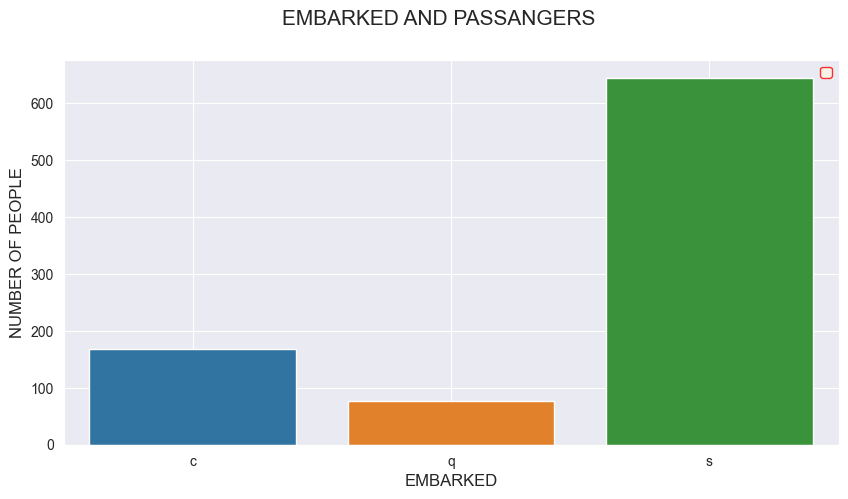

In [394]:
plt.figure(figsize=[10, 5])
plt.suptitle('EMBARKED AND PASSANGERS', fontsize=15)
sns.set_style('darkgrid')
sns.barplot(data=train[(~train['embarked'].isna())].groupby('embarked')['name'].count().reset_index().rename(columns={'name': 'count'}),
            x='embarked',
            y='count',
            hue='embarked')
plt.ylabel('NUMBER OF PEOPLE', fontsize=12)
plt.xlabel('EMBARKED', fontsize=12)
plt.legend(edgecolor = 'r',
           facecolor = 'oldlace')
plt.grid(True)

In [395]:
train['embarked'] = train['embarked'].fillna('s')
test['embarked'] = test['embarked'].fillna('s')

## RESEARCHN DATA ANALYSIS

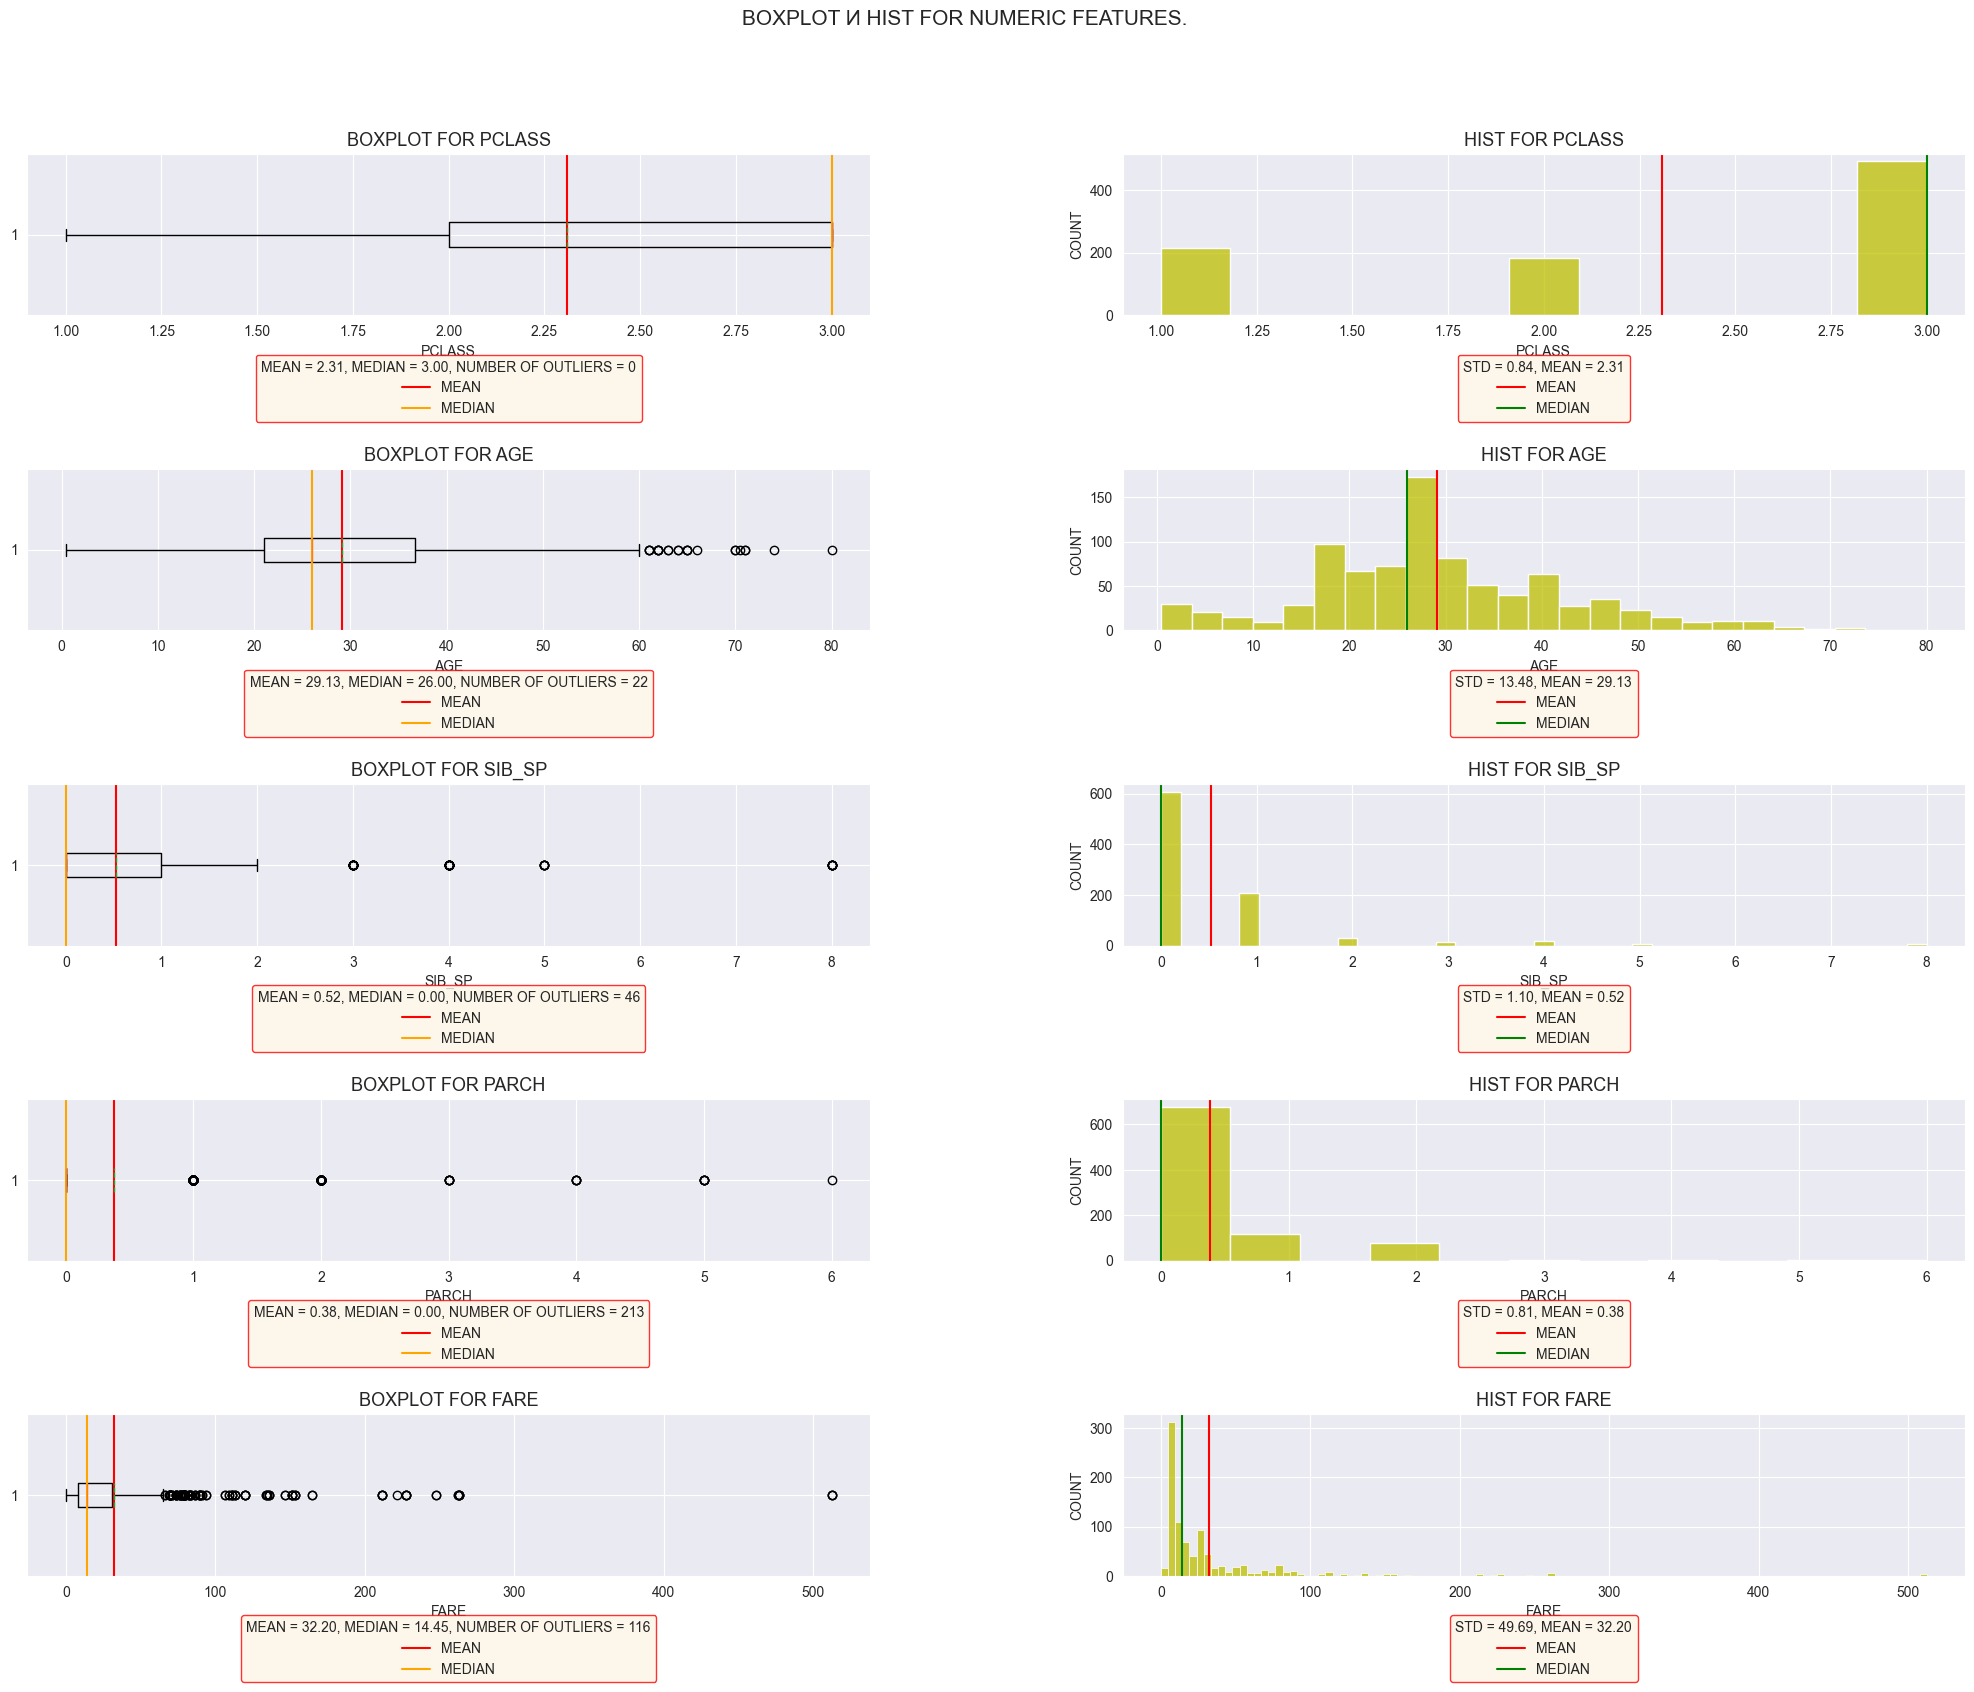

In [396]:
position = 0
plt.figure(figsize=[25, 18])
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.95)
plt.suptitle('BOXPLOT И HIST FOR NUMERIC FEATURES.', fontsize=15)

for column_name in ['pclass', 'age', 'sib_sp', 'parch', 'fare']:
    position += 1
    plt.subplot(5, 2, position)
    plt.title(f'BOXPLOT FOR {column_name.upper()}', fontsize=13)
    sns.set_style('darkgrid')
    boxplot = plt.boxplot(train[column_name].values, vert=False, meanline=True, showmeans=True)
    outliers = list(boxplot['fliers'][0].get_data()[1])
    plt.xlabel(f'{column_name.upper()}')
    plt.axvline(np.mean(train[column_name]), 
               color='r', 
               linestyle='-',
               label='MEAN')
    plt.axvline(np.median(train[column_name]), 
                color='orange', 
                linestyle='-',
                label='MEDIAN')
    median = np.median(train[column_name])
    mean = np.mean(train[column_name])
    plt.legend(title=f'MEAN = {np.mean(train[column_name]):.2f}, MEDIAN = {np.median(train[column_name]):.2f}, NUMBER OF OUTLIERS = {len(outliers)}',
               loc='center', 
               edgecolor = 'r',
               facecolor = 'oldlace',
               bbox_to_anchor=(0.5, -0.45))
    position += 1
    plt.subplot(5, 2, position)
    sns.set_style('darkgrid')
    plt.title(f'HIST FOR {column_name.upper()}', fontsize=13)
    sns.histplot(data=train[column_name], color='y', kde=False)
    plt.ylabel('COUNT')
    plt.xlabel(f'{column_name.upper()}')
    plt.axvline(np.mean(train[column_name]), 
                color='r', 
                linestyle='-',
                label='MEAN')
    plt.axvline(np.median(train[column_name]), 
                color='green', 
                linestyle='-',
                label='MEDIAN')
    std = train[column_name].std()
    plt.legend(title=f'STD = {std:.2f}, MEAN = {mean:.2f}', 
               loc='center', 
               edgecolor = 'r',
               facecolor = 'oldlace',
               bbox_to_anchor=(0.5, -0.45))
plt.show();

### SIB_SP

In [397]:
train['sib_sp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sib_sp, dtype: float64

In [398]:
train['sib_sp'].value_counts()

sib_sp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

### PARCH

In [399]:
train['parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64

In [400]:
train['parch'].value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

### FARE

In [401]:
train['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [402]:
test['fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: fare, dtype: float64

In [403]:
print(f"FARE EQ 0 in TRAIN - {train.query('fare == 0')['name'].count()}")
print(f"\nFARE EQ 0 in TEST - {test.query('fare == 0')['name'].count()}")

FARE EQ 0 in TRAIN - 15

FARE EQ 0 in TEST - 2


In [404]:
train[train['fare'] == 0]

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,title
179,180,0,3,"leonard, mr. lionel",male,36.0,0,0,line,0.0,NaN,s,mr
263,264,0,1,"harrison, mr. william",male,40.0,0,0,112059,0.0,b94,s,mr
271,272,1,3,"tornquist, mr. william henry",male,25.0,0,0,line,0.0,NaN,s,mr
277,278,0,2,"parkes, mr. francis ""frank""",male,31.0,0,0,239853,0.0,NaN,s,mr
302,303,0,3,"johnson, mr. william cahoone jr",male,19.0,0,0,line,0.0,NaN,s,mr
413,414,0,2,"cunningham, mr. alfred fleming",male,31.0,0,0,239853,0.0,NaN,s,mr
466,467,0,2,"campbell, mr. william",male,31.0,0,0,239853,0.0,NaN,s,mr
481,482,0,2,"frost, mr. anthony wood ""archie""",male,31.0,0,0,239854,0.0,NaN,s,mr
597,598,0,3,"johnson, mr. alfred",male,49.0,0,0,line,0.0,NaN,s,mr
633,634,0,1,"parr, mr. william henry marsh",male,40.0,0,0,112052,0.0,NaN,s,mr


In [405]:
train['is_personal'] = train['fare'].apply(lambda x: 1 if x == 0 else 0)
test['is_personal'] = test['fare'].apply(lambda x: 1 if x == 0 else 0)

In [406]:
train['fare'].replace(0, np.nan, inplace=True)
test['fare'].replace(0, np.nan, inplace=True)

In [407]:
def give_fare(row, df):
    fare = row['fare']
    if pd.isna(fare):
        title = row['title']
        pclass = row['pclass']
        sex = row['sex']
        fare = df[(df['title'] == title) & (df['pclass'] == pclass) & (df['sex'] == sex)]['fare'].median()
        if pd.isna(fare):
            fare = df[(df['pclass'] == pclass) & (df['sex'] == sex)]['fare'].median()
    return fare

In [408]:
train['fare'] = train.apply(give_fare, df=train, axis=1)
test['fare'] = test.apply(give_fare, df=test, axis=1)

In [409]:
print('Number of NAN in FARE for Train -', train['fare'].isna().sum())
print('\nNumber of NAN in FARE for Test -', test['fare'].isna().sum())

Number of NAN in FARE for Train - 0

Number of NAN in FARE for Test - 0


In [410]:
del give_fare

## STATISTICAL DATA ANALYSIS

### SEX

In [411]:
# plt.figure(figsize=(10, 5))
# plt.title('ALL PEOPLE', fontsize=15)
# sns.set_style('darkgrid')
# sns.barplot(data=train['survived'].value_counts().rename(index={0: 'DIED', 1:'SURVIVED'}).reset_index(),
#             x='index',
#             y='survived',
#             hue='index',
#             palette=['red', 'green'])
# plt.grid(True)
# legend = plt.legend(title='PASSANGER STATUS',
#            edgecolor = 'r',
#            facecolor = 'oldlace')
# plt.ylabel('COUNT', fontsize=12)
# plt.xlabel('STATUS', fontsize=12);

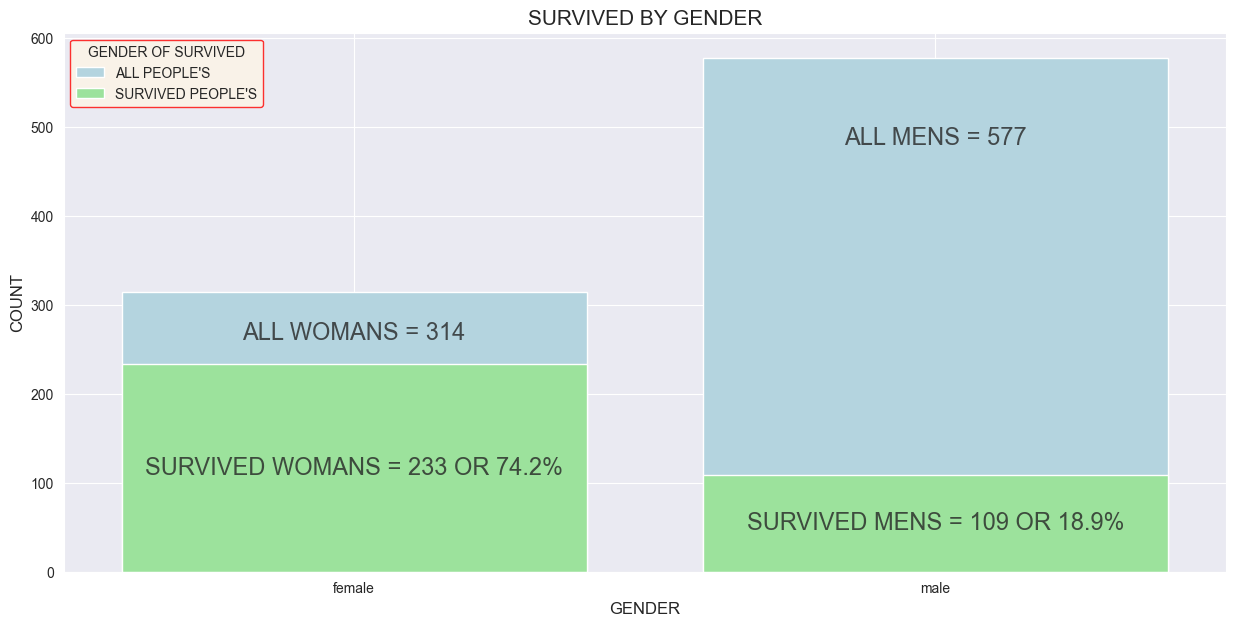

In [412]:
plt.figure(figsize=(15, 7))
plt.title('SURVIVED BY GENDER', fontsize=15)
sns.set_style('darkgrid')
nubmer_of_mans = train[train['sex'] == 'male']['survived'].count()
plt.text(1,(nubmer_of_mans - (nubmer_of_mans/6)), 
         f'ALL MENS = {nubmer_of_mans}', 
         fontsize=17, 
         alpha=0.8, 
         ha='center')
number_of_womans = train[train['sex']== 'female']['survived'].count()
plt.text(0,(number_of_womans - (number_of_womans/6)), 
         f'ALL WOMANS = {number_of_womans}', 
         fontsize=17, 
         alpha=0.8, 
         ha='center')
sns.barplot(data=train[['sex', 'survived']].groupby('sex')['survived'].count().reset_index(),
            x='sex',
            y='survived',
            color='lightblue', 
            label = "ALL PEOPLE'S")
survived_mans = train[(train['survived'] == 1) & (train['sex'] == 'male')]['survived'].count()
plt.text(1,(survived_mans - (survived_mans/2)), 
         f'SURVIVED MENS = {survived_mans} OR {(survived_mans/nubmer_of_mans)*100:.1f}%', 
         fontsize=17, 
         alpha=0.8, 
         ha='center',
         va='center')
survived_womans = train[(train['survived'] == 1) & (train['sex'] == 'female')]['survived'].count()
plt.text(0,(survived_womans - (survived_womans/2)), 
         f'SURVIVED WOMANS = {survived_womans} OR {(survived_womans/number_of_womans)*100:.1f}%', 
         fontsize=17, 
         alpha=0.8, 
         ha='center',
         va='center')
sns.barplot(data=train[train['survived'] == 1][['sex','survived']].groupby('sex')['survived'].count().reset_index(),
            x='sex',
            y='survived',
            color='lightgreen',
            label = "SURVIVED PEOPLE'S")
plt.ylabel('COUNT', fontsize=12)
plt.xlabel('GENDER', fontsize=12)
plt.grid(True)
plt.legend(title='GENDER OF SURVIVED',
           edgecolor = 'r',
           facecolor = 'oldlace');

### PCLASS

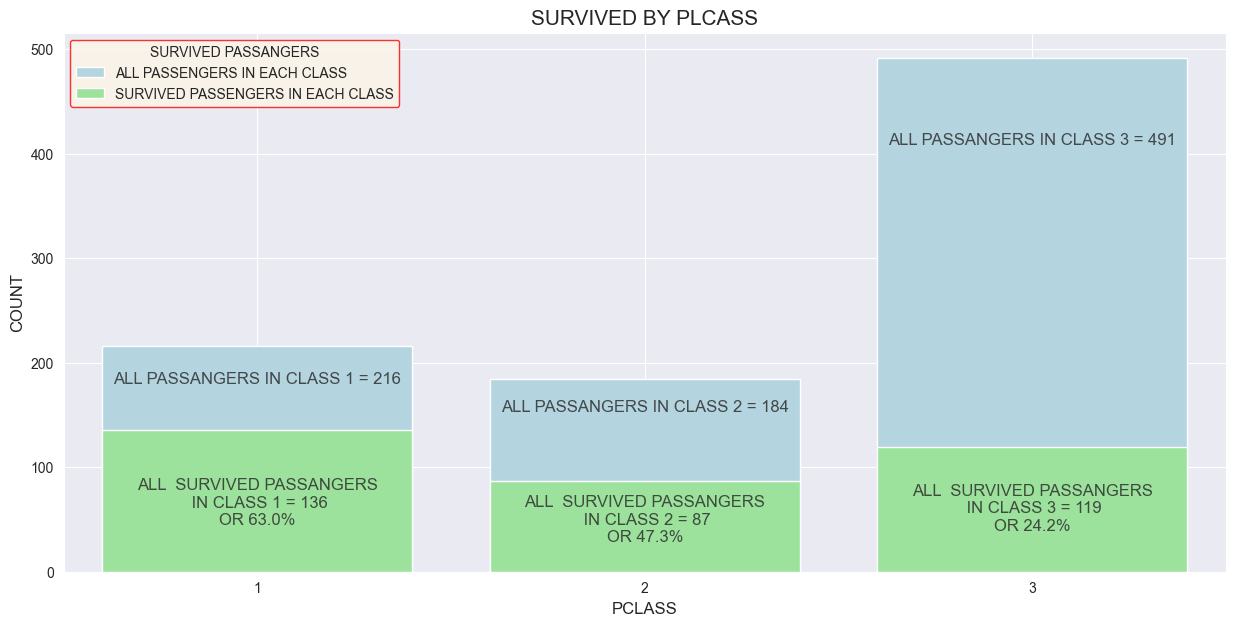

In [413]:
plt.figure(figsize=(15, 7))
plt.title('SURVIVED BY PLCASS', fontsize=15)
sns.set_style('darkgrid')
for pclass in [1,2,3]:
    all_passangers = train[train['pclass'] == pclass]['survived'].count()
    all_survived_in_class = train[(train['pclass'] == pclass) & (train['survived'] == 1)]['survived'].count()
    plt.text((pclass - 1),(all_passangers - (all_passangers/6)), 
             f'ALL PASSANGERS IN CLASS {pclass} = {all_passangers}', 
             fontsize=12, 
             alpha=0.8, 
             ha='center')
    plt.text((pclass - 1),(all_survived_in_class - (all_survived_in_class/1.5)), 
             f'ALL  SURVIVED PASSANGERS\n IN CLASS {pclass} = {all_survived_in_class}\nOR {(all_survived_in_class/all_passangers)*100:.1f}%', 
             fontsize=12, 
             alpha=0.8, 
             ha='center') 
sns.barplot(data=train[['pclass','survived']].groupby('pclass')['survived'].count().reset_index(),
            x='pclass', 
            y='survived',
            color='lightblue', 
            label = "ALL PASSENGERS IN EACH CLASS")
sns.barplot(data=train[train['survived'] == 1][['pclass','survived']].groupby('pclass')['survived'].count().reset_index(),
            x='pclass', 
            y='survived',
            color='lightgreen',
            label = "SURVIVED PASSENGERS IN EACH CLASS")
plt.ylabel('COUNT', fontsize=12)
plt.xlabel('PCLASS', fontsize=12)
plt.grid(True)
plt.legend(title='SURVIVED PASSANGERS',
           edgecolor = 'r',
           facecolor = 'oldlace');

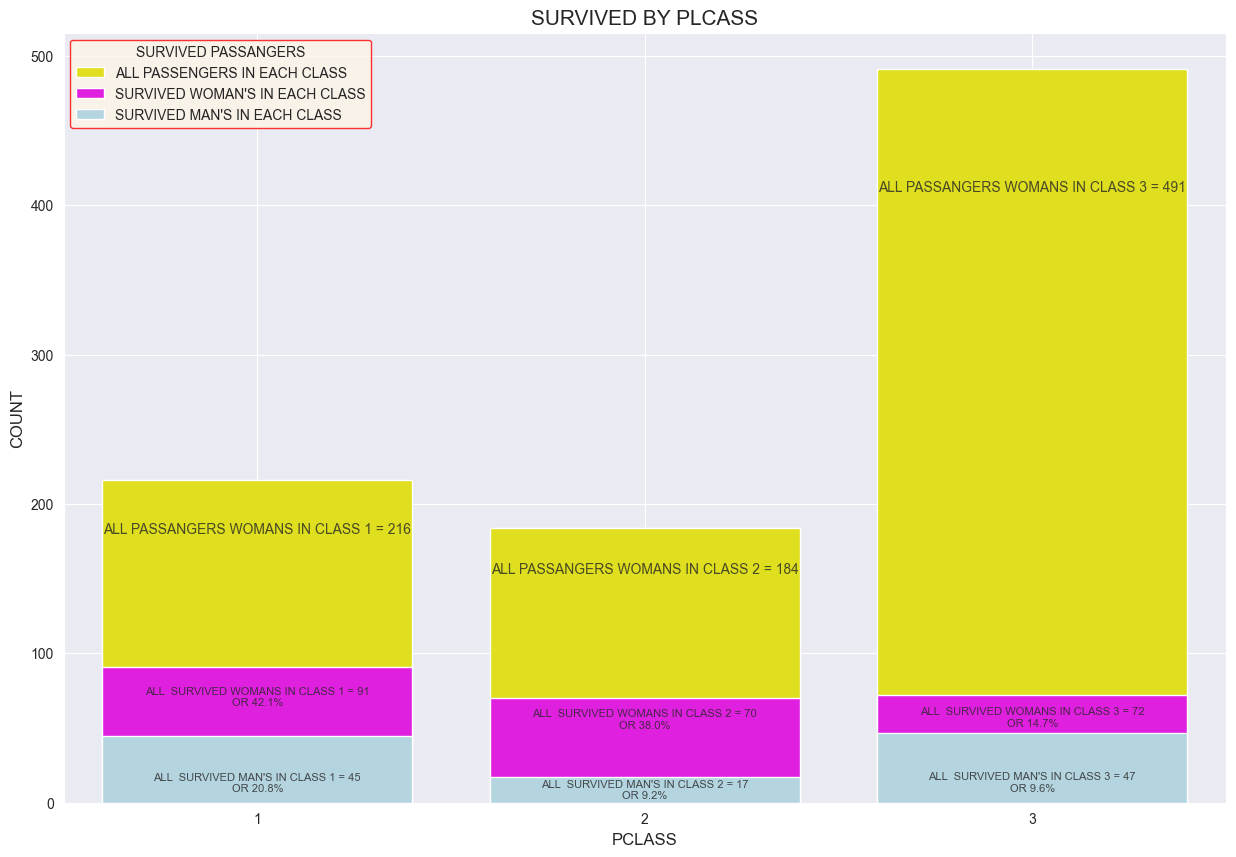

In [414]:
plt.figure(figsize=(15, 10))
plt.title('SURVIVED BY PLCASS', fontsize=15)
sns.set_style('darkgrid')
for pclass in [1,2,3]:
    all_passangers = train[train['pclass'] == pclass]['survived'].count()
    all_survived_womans_in_class = train[(train['pclass'] == pclass) &
                                         (train['survived'] == 1) &
                                         (train['sex'] == 'female')]['survived'].count()
    all_survived_mans_in_class = train[(train['pclass'] == pclass) &
                                         (train['survived'] == 1) &
                                         (train['sex'] == 'male')]['survived'].count()    
    plt.text((pclass - 1),(all_passangers - (all_passangers/6)), 
             f'ALL PASSANGERS WOMANS IN CLASS {pclass} = {all_passangers}', 
             fontsize=10, 
             alpha=0.8, 
             ha='center')
    plt.text((pclass - 1),(all_survived_womans_in_class - (all_survived_womans_in_class/3.5)), 
             f'ALL  SURVIVED WOMANS IN CLASS {pclass} = {all_survived_womans_in_class}\nOR {(all_survived_womans_in_class/all_passangers)*100:.1f}%', 
             fontsize=8, 
             alpha=0.8, 
             ha='center')
    plt.text((pclass - 1),(all_survived_mans_in_class - (all_survived_mans_in_class/1.2)), 
             f"ALL  SURVIVED MAN'S IN CLASS {pclass} = {all_survived_mans_in_class}\nOR {(all_survived_mans_in_class/all_passangers)*100:.1f}%", 
             fontsize=8, 
             alpha=0.8, 
             ha='center')
sns.barplot(data=train[['pclass', 'survived']].groupby('pclass')['survived'].count().reset_index(),
            x='pclass', 
            y='survived',
            color='yellow', 
            label = "ALL PASSENGERS IN EACH CLASS")
sns.barplot(data=train[(train['survived'] == 1) & (train['sex'] == 'female')][['pclass', 'survived']].groupby('pclass')['survived'].count().reset_index(),
            x='pclass', 
            y='survived',
            color='magenta',
            label = "SURVIVED WOMAN'S IN EACH CLASS")
sns.barplot(data=train[(train['survived'] == 1) & (train['sex'] == 'male')][['pclass', 'survived']].groupby('pclass')['survived'].count().reset_index(),
            x='pclass', 
            y='survived',
            color='lightblue',
            label = "SURVIVED MAN'S IN EACH CLASS")
plt.ylabel('COUNT', fontsize=12)
plt.xlabel('PCLASS', fontsize=12)
plt.grid(True)
plt.legend(title='SURVIVED PASSANGERS',
           edgecolor = 'r',
           facecolor = 'oldlace');

### FARE

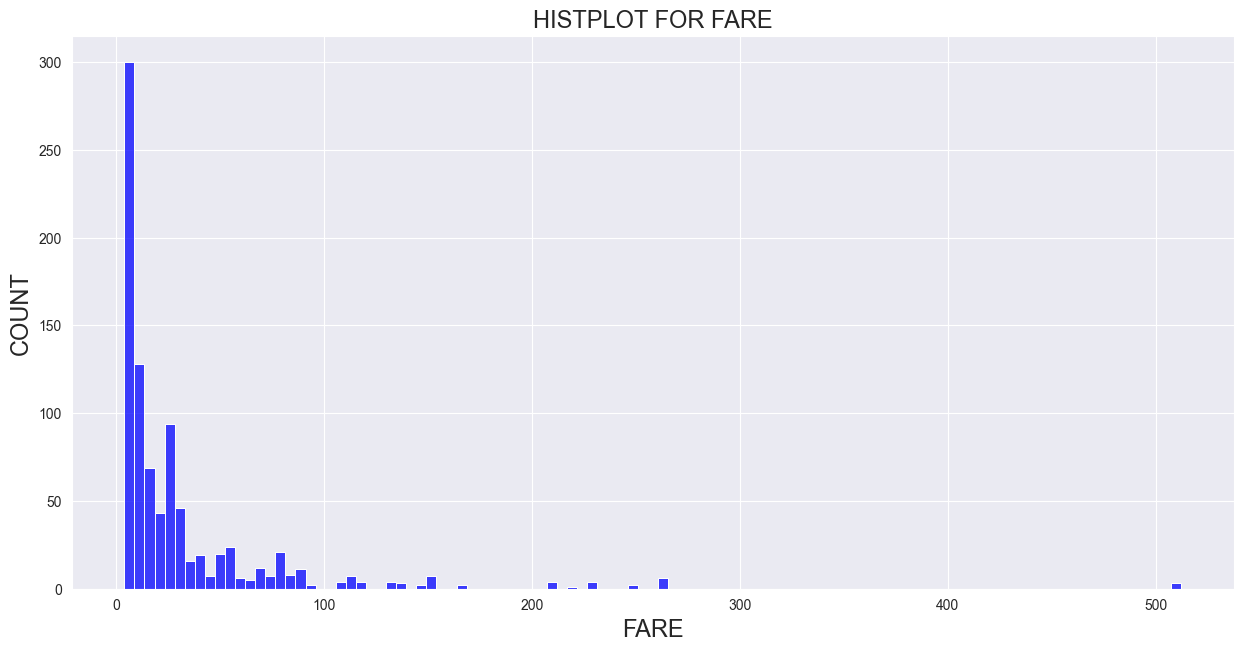

In [415]:
plt.figure(figsize=[15, 7])
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.95)
sns.set_style('darkgrid')
plt.title('HISTPLOT FOR FARE', fontsize=17)
s = sns.histplot(data=train['fare'], color='b', kde=False)
plt.ylabel('COUNT', fontsize=17)
plt.xlabel('FARE', fontsize=17)
plt.show();

In [416]:
list_with_bins_for_fare_intervals = [0, 8, 14, 31, 99, 250, np.inf]
train['fare_intervals'] = pd.cut(train['fare'], list_with_bins_for_fare_intervals)
train['fare_categories'] = pd.cut(train['fare'], list_with_bins_for_fare_intervals, 
                                  labels=[0, 1, 2, 3, 4, 5], include_lowest=True, right=False).astype(int)

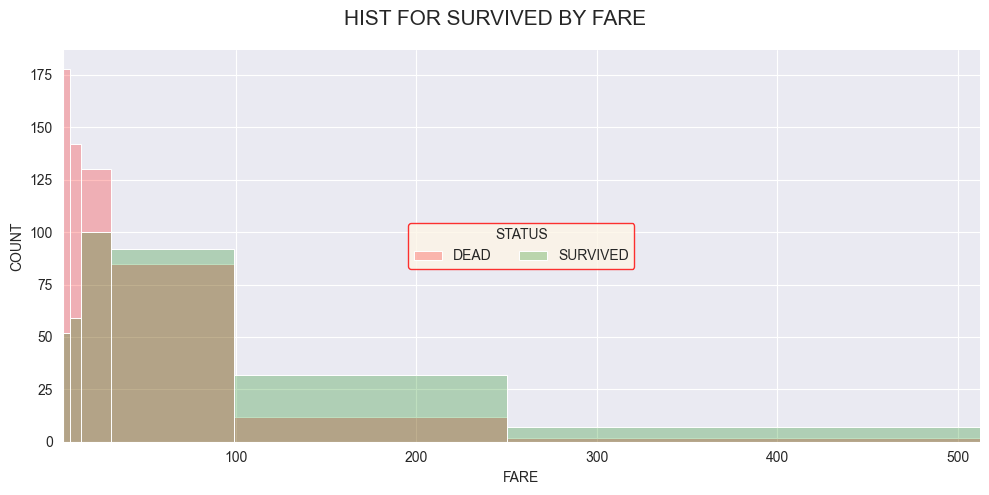

In [417]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 
               'fare',
               alpha=0.25,
               bins=[0, 8, 14, 31, 99, 250, train['fare'].max()],
               element='bars')
facet_grid.set(xlim=(train['fare'].min(), train['fare'].max()))
facet_grid.fig.suptitle('HIST FOR SURVIVED BY FARE', fontsize=15)
facet_grid.set_axis_labels("FARE", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)
plt.legend((('DEAD', 'SURVIVED')),
           title='STATUS', loc='center', 
           edgecolor = 'r',
           facecolor = 'oldlace',
           ncol=2);

In [418]:
fare_intervals = train[['fare_intervals', 'survived']].groupby('fare_intervals')['survived'].mean().reset_index()

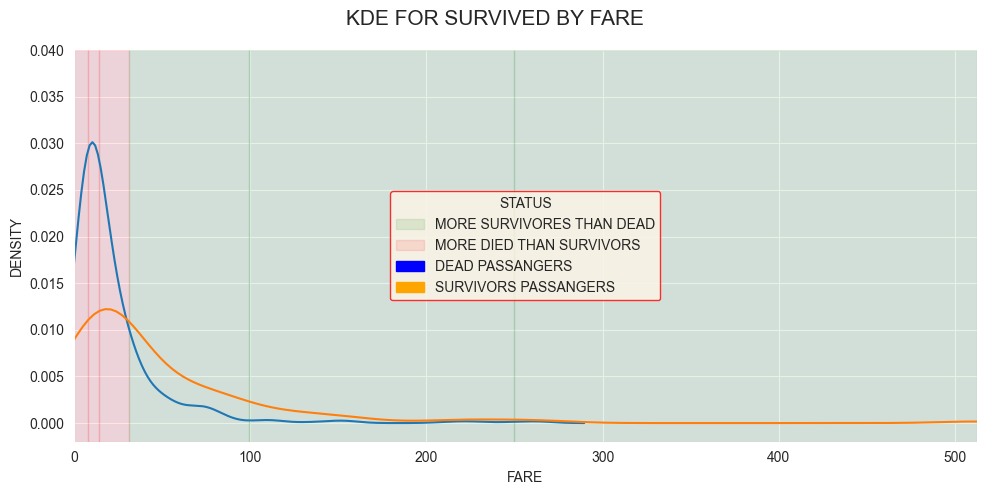

In [419]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2)
facet_grid.map(sns.kdeplot, 'fare')
facet_grid.set(xlim=(0, train['fare'].max()))
facet_grid.fig.suptitle('KDE FOR SURVIVED BY FARE', fontsize=15)
facet_grid.set_axis_labels("FARE", "DENSITY")
facet_grid.fig.subplots_adjust(top=0.90)
plt.ylim(-0.002, 0.04)
for num in range(len(fare_intervals)):
    left = fare_intervals['fare_intervals'][num].left
    right = fare_intervals['fare_intervals'][num].right
    if fare_intervals['fare_intervals'][num].right == np.inf:
        right = train['fare'].max()
    if fare_intervals['survived'][num] > 0.50:
        g = plt.axvspan(left,
                        right,
                        color='green', 
                        alpha=0.10, label='MORE SURVIVORES THAN DEAD')
    elif fare_intervals['survived'][num] < 0.50:
        r = plt.axvspan(left, 
                        right,
                        color='red',
                        alpha=0.10, label='MORE DIED THAN SURVIVORS')
plt.legend(handles=[g, r,
                    Patch(color='blue', label='DEAD PASSANGERS'),
                    Patch(color='orange', label='SURVIVORS PASSANGERS')], 
           title='STATUS', loc='center',
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

In [420]:
test['fare_categories'] = pd.cut(test['fare'], list_with_bins_for_fare_intervals, 
                                 labels=[0, 1, 2, 3, 4, 5], include_lowest=True, right=False).astype(int)

In [421]:
print('UNIQUE VALUES FOR FARE CATEGORIES IN TRAIN -', train['fare_categories'].unique())
print('UNIQUE VALUES FOR FARE CATEGORIES IN TEST - ', test['fare_categories'].unique())

UNIQUE VALUES FOR FARE CATEGORIES IN TRAIN - [0 3 1 2 5 4]
UNIQUE VALUES FOR FARE CATEGORIES IN TEST -  [0 1 2 3 5 4]


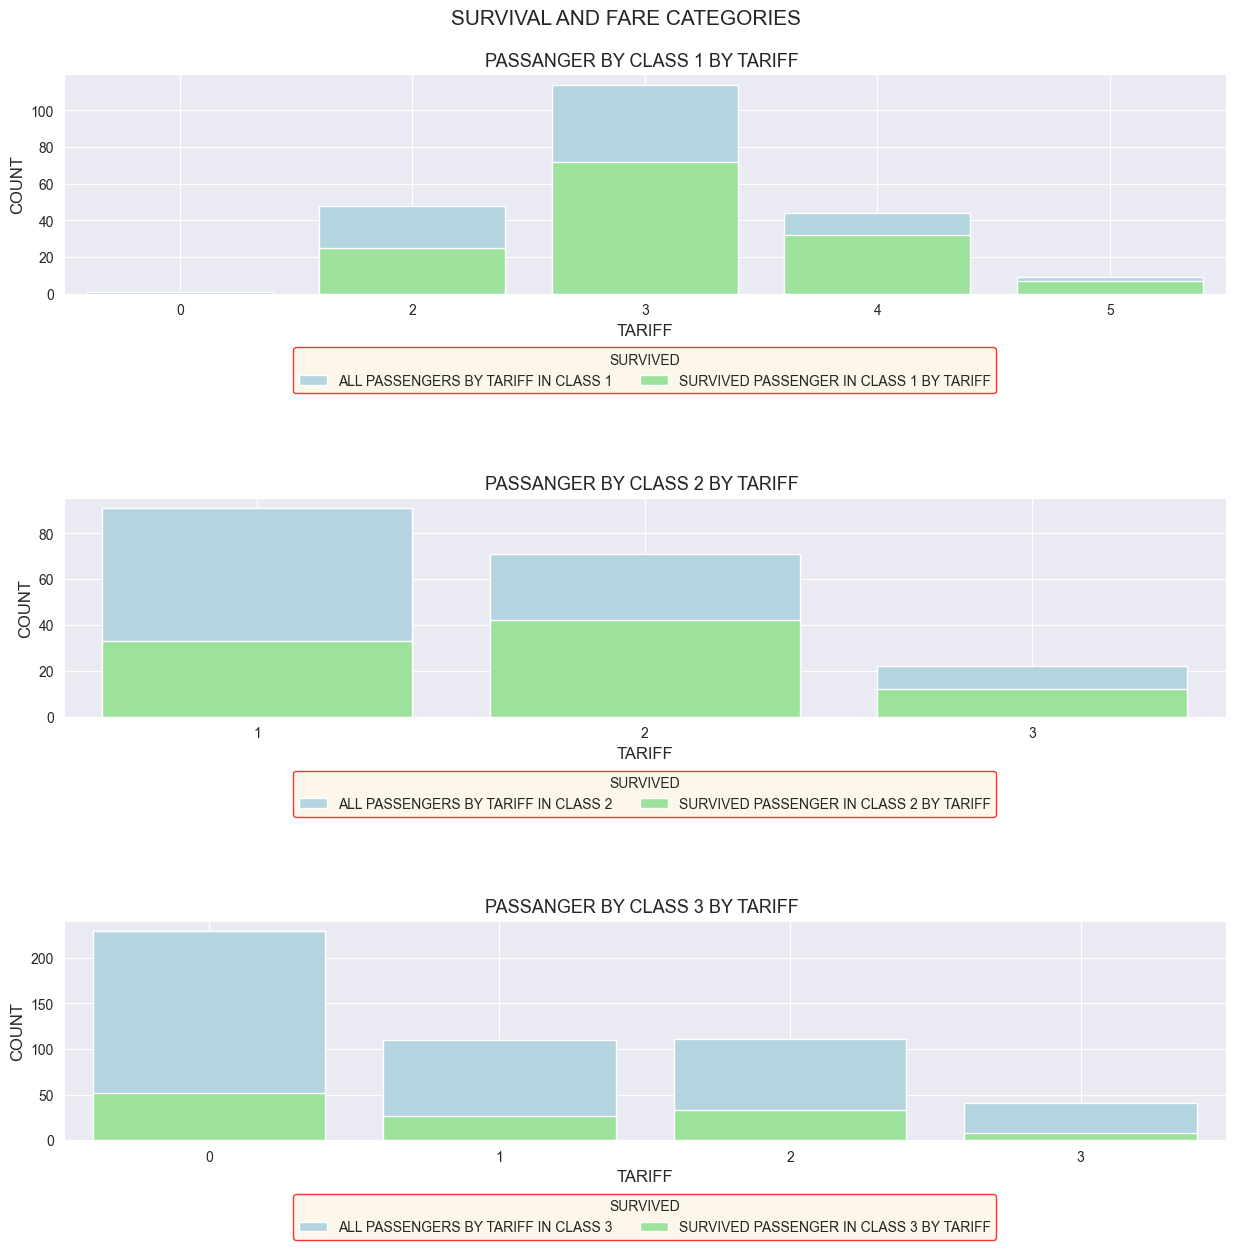

In [422]:
position = 0 
plt.figure(figsize=[15, 13])
plt.subplots_adjust(top=0.93, wspace=0.3, hspace=0.93)
plt.suptitle('SURVIVAL AND FARE CATEGORIES', fontsize=15)
for pclass in [1,2,3]:
    position += 1
    plt.subplot(3, 1, position)
    plt.title(f'PASSANGER BY CLASS {pclass} BY TARIFF ', fontsize=13)
    sns.set_style('darkgrid')
    sns.barplot(data=train[train['pclass'] == pclass].groupby('fare_categories')['survived'].count().reset_index(),
                x='fare_categories',
                y='survived',
                color='lightblue',
                label = f"ALL PASSENGERS BY TARIFF IN CLASS {pclass}")
    plt.grid(True)
    plt.ylabel('COUNT', fontsize=12)
    plt.xlabel('TARIFF', fontsize=12)
    sns.barplot(data=train[(train['survived'] == 1) & (train['pclass'] == pclass)].groupby('fare_categories')['survived'].count().reset_index(),
                x='fare_categories',
                y='survived',
                color='lightgreen',
                label = f"SURVIVED PASSENGER IN CLASS {pclass} BY TARIFF")
    plt.grid(True)
    plt.ylabel('COUNT', fontsize=12)
    plt.xlabel('TARIFF', fontsize=12)
    plt.legend(title=f'SURVIVED', 
                       loc='center', 
                       edgecolor = 'r',
                       facecolor = 'oldlace',
                       ncol=2,
                       bbox_to_anchor=(0.5, -0.35))
plt.grid(True);

In [423]:
train.drop(['fare_intervals'], axis=1, inplace=True)
del fare_intervals, list_with_bins_for_fare_intervals

### AGE

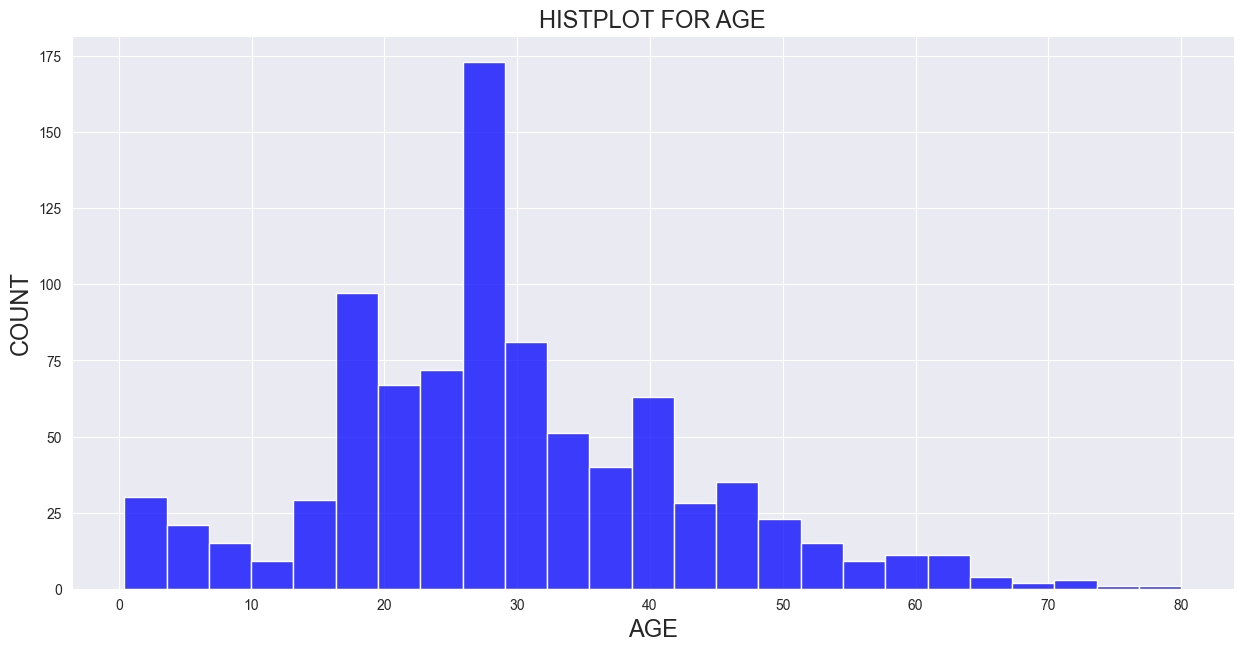

In [424]:
plt.figure(figsize=[15, 7])
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.95)
sns.set_style('darkgrid')
plt.title('HISTPLOT FOR AGE', fontsize=17)
s = sns.histplot(data=train['age'], color='b', kde=False)
plt.ylabel('COUNT', fontsize=17)
plt.xlabel('AGE', fontsize=17)
plt.show();

In [425]:
list_with_bins_for_age_intervals = [0, 11, 17, 23, 27, 32, 40, 59, np.inf]
train['age_intervals'] = pd.cut(train['age'], list_with_bins_for_age_intervals)
train['age_categories'] = pd.cut(train['age'], list_with_bins_for_age_intervals, 
                                 labels=[7, 6, 5, 4, 3, 2, 1, 0], include_lowest=True, right=False).astype(int)

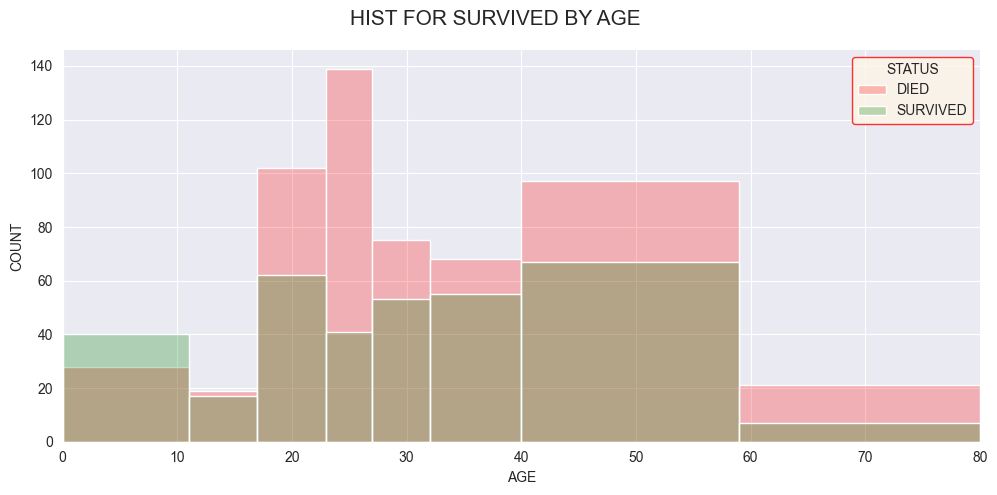

In [426]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'age',
               alpha=0.25,
               element='bars',
               bins=[0, 11, 17, 23, 27, 32, 40, 59, train['age'].max()])
facet_grid.set(xlim=(0, train['age'].max()))
facet_grid.fig.suptitle('HIST FOR SURVIVED BY AGE', fontsize=15)
facet_grid.set_axis_labels("AGE", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(('DIED', 'SURVIVED'),
    title='STATUS',
    edgecolor = 'r',
    facecolor = 'oldlace')
plt.show();

In [427]:
age_intervals = train[['age_intervals', 'survived']].groupby('age_intervals')['survived'].mean().reset_index()

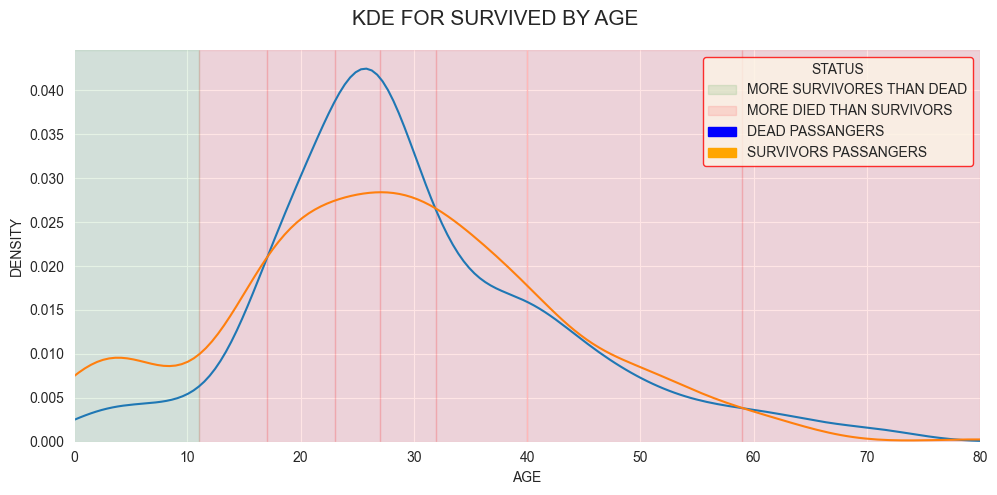

In [428]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2)
facet_grid.map(sns.kdeplot, 'age')
facet_grid.set(xlim=(0, train['age'].max()))
facet_grid.fig.suptitle('KDE FOR SURVIVED BY AGE', fontsize=15)
facet_grid.set_axis_labels("AGE", "DENSITY")
facet_grid.fig.subplots_adjust(top=0.90)

for num in range(len(age_intervals)):
    left = age_intervals['age_intervals'][num].left
    right = age_intervals['age_intervals'][num].right
    if age_intervals['age_intervals'][num].right == np.inf:
        right = train['age'].max()
    if age_intervals['survived'][num] > 0.50:
        g = plt.axvspan(left,
                        right,
                        color='green', 
                        alpha=0.10, label='MORE SURVIVORES THAN DEAD')
    elif age_intervals['survived'][num] < 0.50:
        r = plt.axvspan(left, 
                        right,
                        color='red',
                        alpha=0.10, label='MORE DIED THAN SURVIVORS')
plt.legend(handles=[g, r,
                    Patch(color='blue', label='DEAD PASSANGERS'),
                    Patch(color='orange', label='SURVIVORS PASSANGERS')], 
           title='STATUS',
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

In [429]:
test['age_categories'] = pd.cut(test['age'], list_with_bins_for_age_intervals, 
                                labels=[7, 6, 5, 4, 3, 2, 1, 0], include_lowest=True, right=False).astype(int)

In [430]:
print('UNIQUE VALUES FOR AGE CATEGORIES IN TRAIN -', train['age_categories'].unique())
print('UNIQUE VALUES FOR AGE CATEGORIES IN TEST - ', test['age_categories'].unique())

UNIQUE VALUES FOR AGE CATEGORIES IN TRAIN - [5 2 4 1 7 3 6 0]
UNIQUE VALUES FOR AGE CATEGORIES IN TEST -  [2 1 0 3 5 6 4 7]


In [431]:
train.drop(['age_intervals'], axis=1, inplace=True)

In [432]:
del age_intervals, list_with_bins_for_age_intervals

### FAMILY

#### SIB_SP

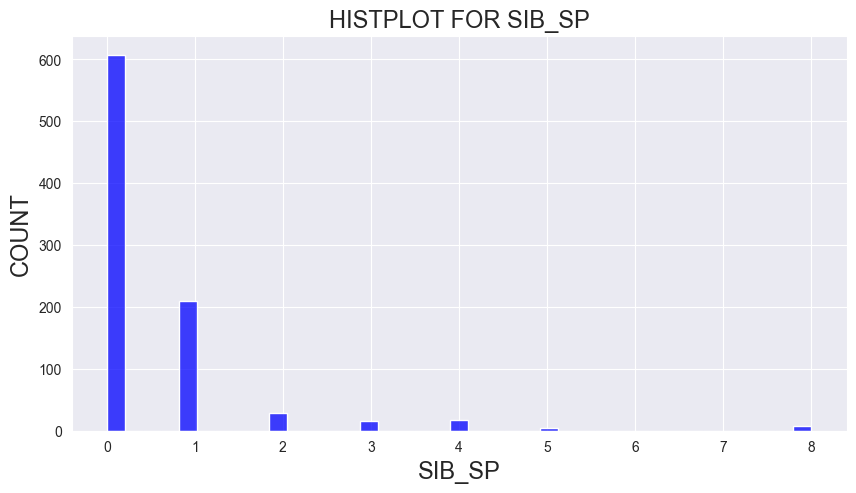

In [433]:
plt.figure(figsize=[10, 5])
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.95)
sns.set_style('darkgrid')
plt.title('HISTPLOT FOR SIB_SP', fontsize=17)
s = sns.histplot(data=train['sib_sp'], color='b', kde=False)
plt.ylabel('COUNT', fontsize=17)
plt.xlabel('SIB_SP', fontsize=17)
plt.show();

In [434]:
list_with_bins_for_sib_sp_intervals = [-1,0,1,2,4,np.inf]

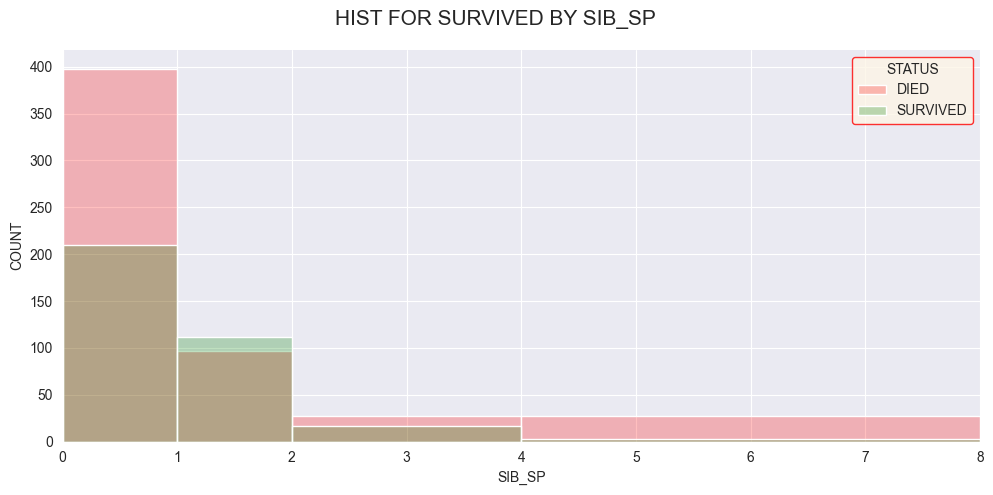

In [435]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 
               'sib_sp',
               alpha=0.25,
               element='bars',
               bins=[0,1,2,4,train['sib_sp'].max()])
facet_grid.set(xlim=(0, train['sib_sp'].max()))
facet_grid.fig.suptitle('HIST FOR SURVIVED BY SIB_SP', fontsize=15)
facet_grid.set_axis_labels("SIB_SP", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(('DIED', 'SURVIVED'),
    title='STATUS',
    edgecolor = 'r',
    facecolor = 'oldlace')
plt.show();

In [436]:
train['sib_sp_categories'] = pd.cut(train['sib_sp'], list_with_bins_for_sib_sp_intervals, 
                                    labels=[0, 1, 2, 3, 4], include_lowest=True, right=False).astype(int)
train['sib_sp_intervals'] = pd.cut(train['sib_sp'], bins=list_with_bins_for_sib_sp_intervals)
sib_sp_intervals = train[['sib_sp_intervals', 'survived']].groupby('sib_sp_intervals')['survived'].mean().reset_index()

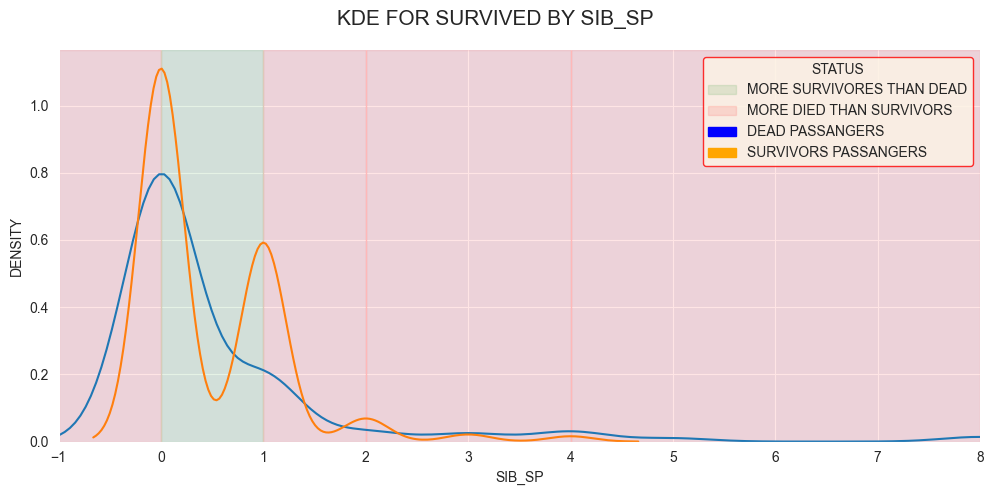

In [437]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2)
facet_grid.map(sns.kdeplot, 'sib_sp', )
facet_grid.set(xlim=(-1, train['sib_sp'].max()))
facet_grid.fig.suptitle('KDE FOR SURVIVED BY SIB_SP', fontsize=15)
facet_grid.set_axis_labels("SIB_SP", "DENSITY")
facet_grid.fig.subplots_adjust(top=0.90)

for num in range(len(sib_sp_intervals)):
    left = sib_sp_intervals['sib_sp_intervals'][num].left
    right = sib_sp_intervals['sib_sp_intervals'][num].right
    if sib_sp_intervals['sib_sp_intervals'][num].right == np.inf:
        right = train['sib_sp'].max()
    if sib_sp_intervals['survived'][num] > 0.50:
        g = plt.axvspan(left,
                        right,
                        color='green', 
                        alpha=0.10, label='MORE SURVIVORES THAN DEAD')
    elif sib_sp_intervals['survived'][num] < 0.50:
        r = plt.axvspan(left, 
                        right,
                        color='red',
                        alpha=0.10, label='MORE DIED THAN SURVIVORS')
plt.legend(handles=[g, r,
                    Patch(color='blue', label='DEAD PASSANGERS'),
                    Patch(color='orange', label='SURVIVORS PASSANGERS')], 
           title='STATUS',
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

In [438]:
test['sib_sp_categories'] = pd.cut(test['sib_sp'], list_with_bins_for_sib_sp_intervals, 
                                   labels=[0, 1, 2, 3, 4], include_lowest=True, right=False).astype(int)

In [439]:
print('UNIQUE VALUES FOR SIB_SP CATEGORIES IN TRAIN -', train['sib_sp_categories'].unique())
print('UNIQUE VALUES FOR SIB_SP CATEGORIES IN TEST - ', test['sib_sp_categories'].unique())

UNIQUE VALUES FOR SIB_SP CATEGORIES IN TRAIN - [2 1 3 4]
UNIQUE VALUES FOR SIB_SP CATEGORIES IN TEST -  [1 2 3 4]


In [440]:
train.drop('sib_sp_intervals', axis=1, inplace=True)
del sib_sp_intervals, list_with_bins_for_sib_sp_intervals

#### PARCH

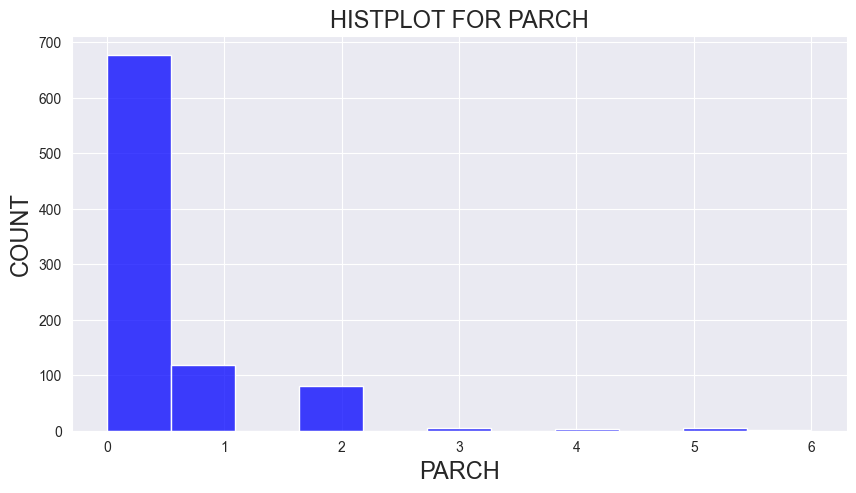

In [441]:
plt.figure(figsize=[10, 5])
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.95)
sns.set_style('darkgrid')
plt.title('HISTPLOT FOR PARCH', fontsize=17)
s = sns.histplot(data=train['parch'], color='b', kde=False)
plt.ylabel('COUNT', fontsize=17)
plt.xlabel('PARCH', fontsize=17)
plt.show();

In [442]:
list_with_bins_for_parch_intervals = [-1,0,1,2,np.inf]

In [443]:
train['parch_categories'] = pd.cut(train['parch'], list_with_bins_for_parch_intervals, 
                                    labels=[0, 1, 2, 3], include_lowest=True, right=False).astype(int)
train['parch_intervals'] = pd.cut(train['parch'], bins=list_with_bins_for_parch_intervals)
sib_sp_intervals = train[['parch_intervals', 'survived']].groupby('parch_intervals')['survived'].mean().reset_index()

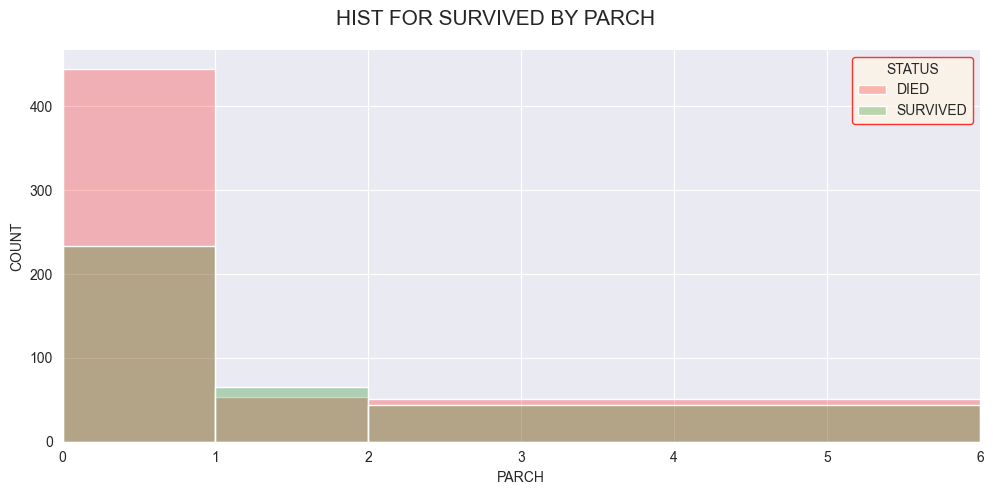

In [444]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'parch',
               alpha=0.25,
               element='bars',
               bins=[-1,0,1,2, train['parch'].max()])
facet_grid.set(xlim=(0, train['parch'].max()))
facet_grid.fig.suptitle('HIST FOR SURVIVED BY PARCH', fontsize=15)
facet_grid.set_axis_labels("PARCH", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(('DIED', 'SURVIVED'),
    title='STATUS',
    edgecolor = 'r',
    facecolor = 'oldlace')
plt.show();

In [445]:
parch_intervals = train[['parch_intervals', 'survived']].groupby('parch_intervals')['survived'].mean().reset_index()

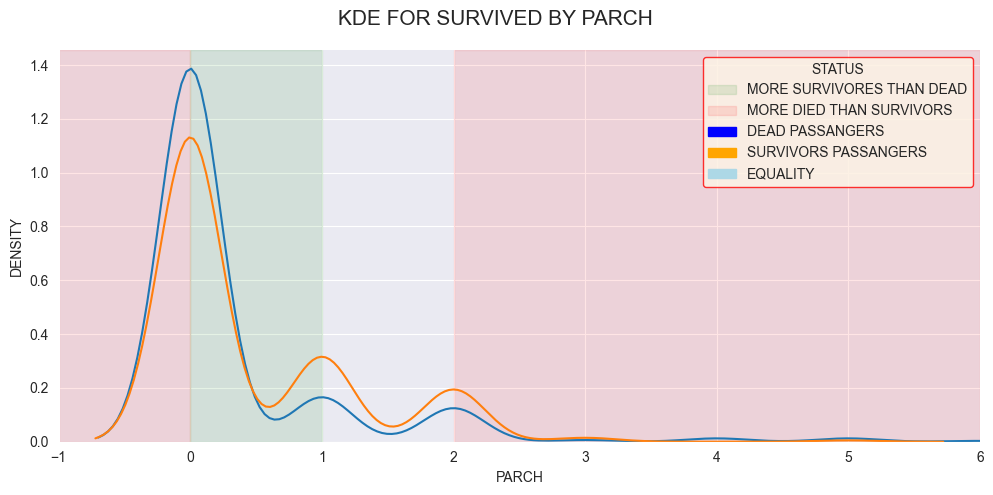

In [446]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2)
facet_grid.map(sns.kdeplot, 'parch')
facet_grid.set(xlim=(-1, train['parch'].max()))
facet_grid.fig.suptitle('KDE FOR SURVIVED BY PARCH', fontsize=15)
facet_grid.set_axis_labels("PARCH", "DENSITY")
facet_grid.fig.subplots_adjust(top=0.90)

for num in range(len(parch_intervals)):
    left = sib_sp_intervals['parch_intervals'][num].left
    right = sib_sp_intervals['parch_intervals'][num].right
    if parch_intervals['parch_intervals'][num].right == np.inf:
        right = train['parch'].max()
    if parch_intervals['survived'][num] > 0.50:
        g = plt.axvspan(left,
                        right,
                        color='green', 
                        alpha=0.10, label='MORE SURVIVORES THAN DEAD')
    elif parch_intervals['survived'][num] < 0.50:
        r = plt.axvspan(left, 
                        right,
                        color='red',
                        alpha=0.10, label='MORE DIED THAN SURVIVORS')
plt.legend(handles=[g, r,
                    Patch(color='blue', label='DEAD PASSANGERS'),
                    Patch(color='orange', label='SURVIVORS PASSANGERS'),
                    Patch(color='lightblue', label='EQUALITY')], 
           title='STATUS',
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

In [447]:
test['parch_categories'] = pd.cut(test['parch'], list_with_bins_for_parch_intervals, 
                                    labels=[0, 1, 2, 3], include_lowest=True, right=False).astype(int)

In [448]:
print('UNIQUE VALUES FOR PARCH CATEGORIES IN TRAIN -', train['parch_categories'].unique())
print('UNIQUE VALUES FOR PARCH CATEGORIES IN TEST - ', test['parch_categories'].unique())

UNIQUE VALUES FOR PARCH CATEGORIES IN TRAIN - [1 2 3]
UNIQUE VALUES FOR PARCH CATEGORIES IN TEST -  [1 2 3]


In [449]:
train.drop('parch_intervals', axis=1, inplace=True)
del parch_intervals, list_with_bins_for_parch_intervals

#### FAMILY SIZE

In [450]:
train['family_size'] = train['sib_sp'] + train['parch']

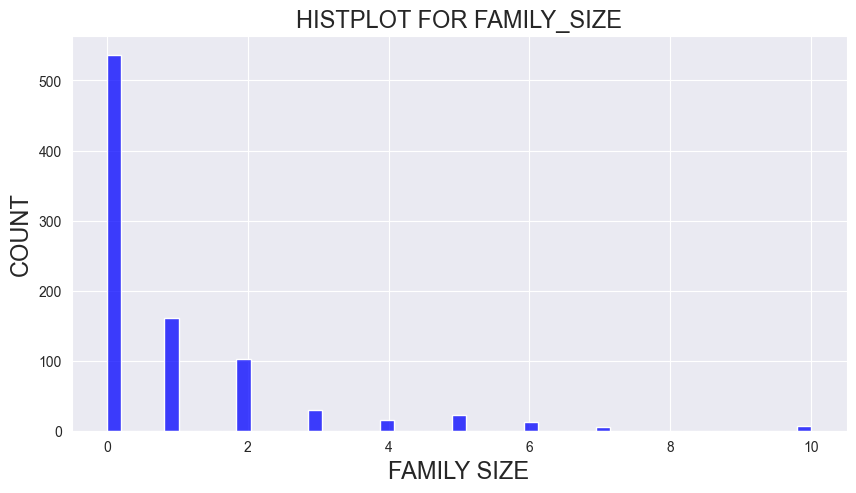

In [451]:
plt.figure(figsize=[10, 5])
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.95)
sns.set_style('darkgrid')
plt.title('HISTPLOT FOR FAMILY_SIZE', fontsize=17)
s = sns.histplot(data=train['family_size'], color='b', kde=False)
plt.ylabel('COUNT', fontsize=17)
plt.xlabel('FAMILY SIZE', fontsize=17)
plt.show();

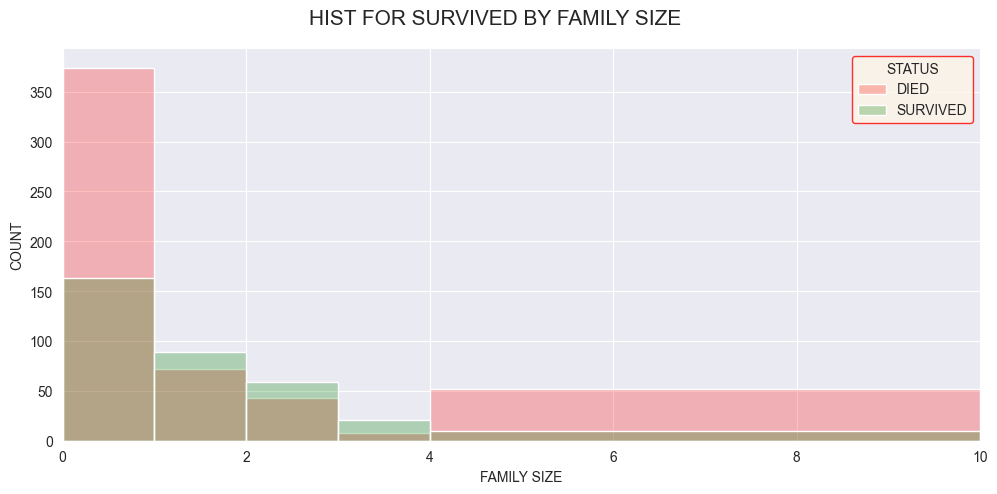

In [452]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'family_size',
               alpha=0.25,
               element='bars',
               bins=[0,1,2,3,4,train['family_size'].max()])
facet_grid.set(xlim=(0, train['family_size'].max()))
facet_grid.fig.suptitle('HIST FOR SURVIVED BY FAMILY SIZE', fontsize=15)
facet_grid.set_axis_labels("FAMILY SIZE", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(('DIED', 'SURVIVED'),
    title='STATUS',
    edgecolor = 'r',
    facecolor = 'oldlace')
plt.show();

In [453]:
train['family_size_intervals_intervals'] = pd.cut(train['family_size'], bins=[-1,0,1,2,3,4,np.inf])
family_size_intervals = train[['family_size_intervals_intervals', 'survived']].groupby('family_size_intervals_intervals')['survived'].mean().reset_index()

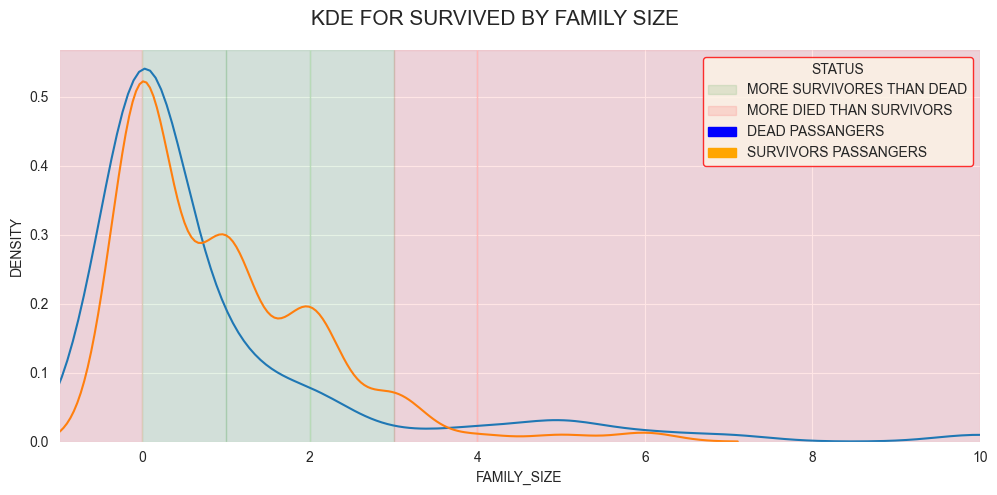

In [454]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2)
facet_grid.map(sns.kdeplot, 'family_size')
facet_grid.set(xlim=(-1, train['family_size'].max()))
facet_grid.fig.suptitle('KDE FOR SURVIVED BY FAMILY SIZE', fontsize=15)
facet_grid.set_axis_labels("FAMILY_SIZE", "DENSITY")
facet_grid.fig.subplots_adjust(top=0.90)

for num in range(len(family_size_intervals)):
    left = family_size_intervals['family_size_intervals_intervals'][num].left
    right = family_size_intervals['family_size_intervals_intervals'][num].right
    if family_size_intervals['family_size_intervals_intervals'][num].right == np.inf:
        right = train['family_size'].max()
    if family_size_intervals['survived'][num] > 0.50:
        g = plt.axvspan(left,
                        right,
                        color='green', 
                        alpha=0.10, label='MORE SURVIVORES THAN DEAD')
    elif family_size_intervals['survived'][num] < 0.50:
        r = plt.axvspan(left, 
                        right,
                        color='red',
                        alpha=0.10, label='MORE DIED THAN SURVIVORS')
plt.legend(handles=[g, r,
                    Patch(color='blue', label='DEAD PASSANGERS'),
                    Patch(color='orange', label='SURVIVORS PASSANGERS')], 
           title='STATUS',
           edgecolor = 'r',
           facecolor = 'oldlace')
plt.show();

In [455]:
test['family_size'] = test['parch'] + test['sib_sp']

In [456]:
print('UNIQUE VALUES IN TRAIN FOR FAMILY SIZE -', sorted(train['family_size'].unique()))
print('UNIQUE VALUES IN TEST FOR FAMILY SIZE -',sorted(test['family_size'].unique()))

UNIQUE VALUES IN TRAIN FOR FAMILY SIZE - [0, 1, 2, 3, 4, 5, 6, 7, 10]
UNIQUE VALUES IN TEST FOR FAMILY SIZE - [0, 1, 2, 3, 4, 5, 6, 7, 10]


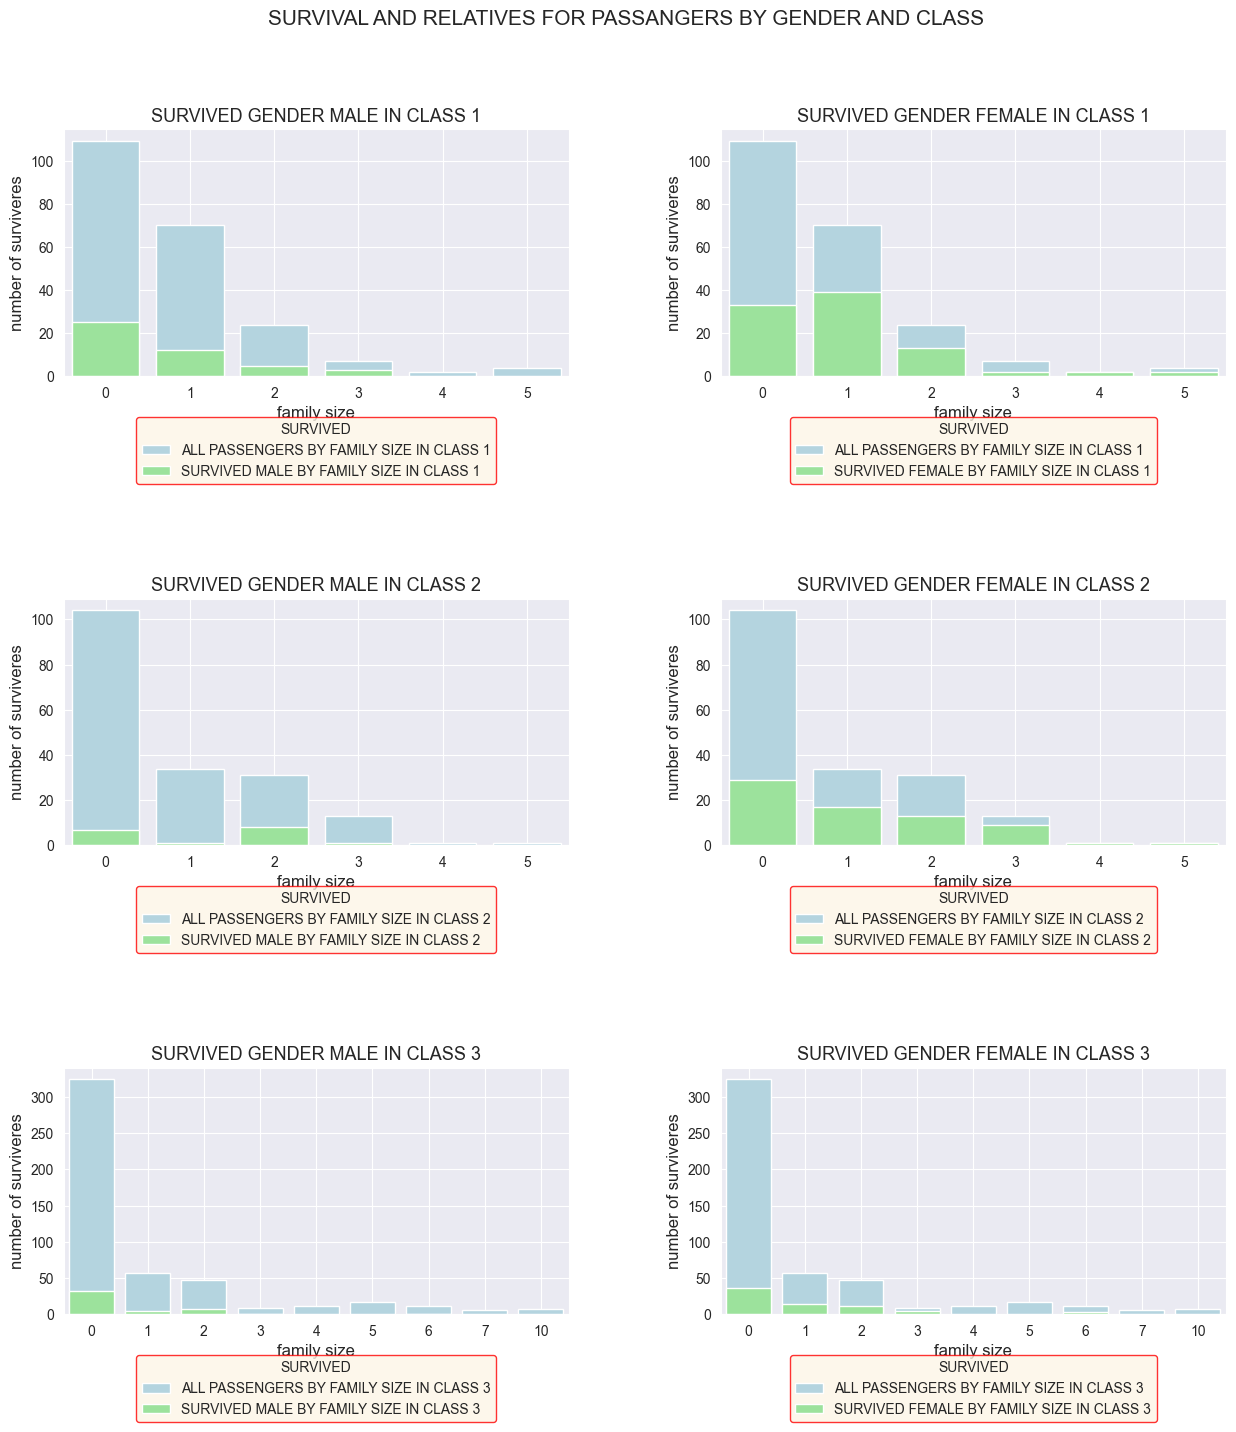

In [457]:
position = 0 
plt.figure(figsize=[15, 15])
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.90)
plt.suptitle('SURVIVAL AND RELATIVES FOR PASSANGERS BY GENDER AND CLASS', fontsize=15)
for pclass in [1,2,3]:
    for gender in ['male', 'female']:
        position += 1
        plt.subplot(3, 2, position)
        plt.title(f'SURVIVED GENDER {str(gender).upper()} IN CLASS {pclass}', fontsize=13)
        sns.set_style('darkgrid')
        sns.barplot(data=train[train['pclass'] == pclass].pivot_table(index='family_size', values='survived', aggfunc='count').reset_index(),
                    x='family_size',
                    y='survived',
                    color='lightblue',
                    label = f"ALL PASSENGERS BY FAMILY SIZE IN CLASS {pclass}")
        plt.grid(True)
        plt.ylabel('number of surviveres', fontsize=12)
        plt.xlabel('family_size', fontsize=12)
        sns.barplot(data=train[(train['sex'] == gender) & (train['survived'] == 1) & (train['pclass'] == pclass)].pivot_table(index='family_size', values='survived', aggfunc='count').reset_index(),
                    x='family_size',
                    y='survived',
                    color='lightgreen',
                    label = f"SURVIVED {str(gender).upper()} BY FAMILY SIZE IN CLASS {pclass}")
        plt.grid(True)
        plt.ylabel('number of surviveres', fontsize=12)
        plt.xlabel('family size', fontsize=12)
        plt.legend(title=f'SURVIVED', 
                   loc='center', 
                   edgecolor = 'r',
                   facecolor = 'oldlace',
                   bbox_to_anchor=(0.5, -0.30))
plt.grid(True);

In [458]:
train.drop(['family_size_intervals_intervals'], axis=1, inplace=True)
del family_size_intervals

#### FAMILY STATUS

#### IS MOTHER

In [459]:
def give_mother_status(row, df):
    status = 0
    title = row['title']
    parch = row['parch']
    if (title == 'mrs') and (parch != 0):
        status = 1
    return status

In [460]:
train['is_mother'] = train.apply(give_mother_status, df=train, axis=1)

In [461]:
print('SURVIVAL PERCENTAGE FOR MOTHER STATUS')
print('='*100)
train.groupby('is_mother')['survived'].mean()

SURVIVAL PERCENTAGE FOR MOTHER STATUS


is_mother
0    0.361677
1    0.714286
Name: survived, dtype: float64

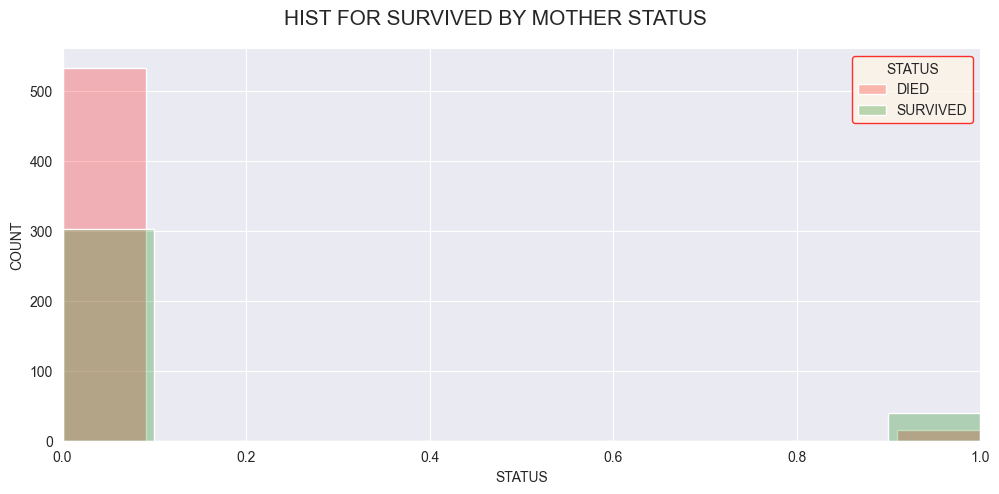

In [462]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'is_mother',
               alpha=0.25,
               element='bars')
facet_grid.set(xlim=(0, 1))
facet_grid.fig.suptitle('HIST FOR SURVIVED BY MOTHER STATUS', fontsize=15)
facet_grid.set_axis_labels("STATUS", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(('DIED', 'SURVIVED'),
    title='STATUS',
    edgecolor = 'r',
    facecolor = 'oldlace')
plt.show();

In [463]:
test['is_mother'] = train.apply(give_mother_status, df=test, axis=1)

In [464]:
del give_mother_status

#### NOT ALONE

In [465]:
train['not_alone'] = train['family_size'].apply(lambda x: 1 if x != 0 else 0)

In [466]:
print('SURVIVAL PERCENTAGE FOR NOT ALONE STATUS')
print('='*100)
train.groupby('not_alone')['survived'].mean()

SURVIVAL PERCENTAGE FOR NOT ALONE STATUS


not_alone
0    0.303538
1    0.505650
Name: survived, dtype: float64

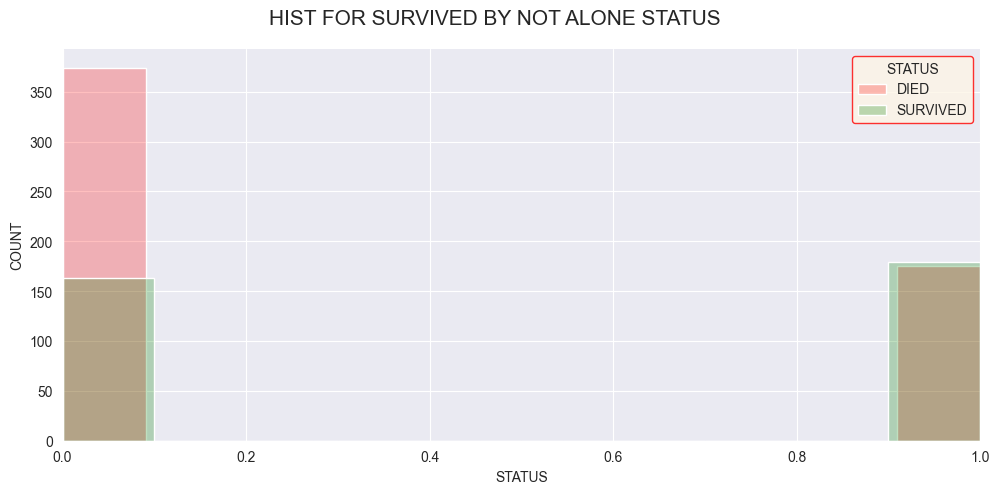

In [467]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 'not_alone',
               alpha=0.25,
               element='bars')
facet_grid.set(xlim=(0, 1))
facet_grid.fig.suptitle('HIST FOR SURVIVED BY NOT ALONE STATUS', fontsize=15)
facet_grid.set_axis_labels("STATUS", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)       
plt.legend(('DIED', 'SURVIVED'),
    title='STATUS',
    edgecolor = 'r',
    facecolor = 'oldlace')
plt.show();

In [468]:
test['not_alone'] = test['family_size'].apply(lambda x: 1 if x != 0 else 0)

### CABIN

In [469]:
print('Number of NAN in column "Cabin" for Train -', train['cabin'].isna().sum())
print('\nNumber of NAN in column "Cabin" for Test -', test['cabin'].isna().sum())

Number of NAN in column "Cabin" for Train - 687

Number of NAN in column "Cabin" for Test - 327


In [470]:
train['cabin'].fillna('u', inplace=True)
test['cabin'].fillna('u', inplace=True)

In [471]:
train['deck'] = train['cabin'].str[:1]
test['deck'] = test['cabin'].str[:1]

In [472]:
# train['deck'].fillna('u', inplace=True)
# test['deck'].fillna('u', inplace=True)

In [473]:
# position = 0
# plt.figure(figsize=[15, 5])
# plt.subplots_adjust(top=0.88, wspace=0.3, hspace=0.98)
# plt.suptitle('DECK AND PCLASS', fontsize=15)
# for p in [1,2,3]:
#     sns.set_style('darkgrid')
#     plt.grid(True)
#     df = train.query('(pclass == @p)')['deck']
#     position += 1
#     plt.subplot(1, 3, position)
#     plt.title(f'DECK FOR CLASS {p}', fontsize=12)
#     sns.barplot(x='index', 
#                 y='deck',
#                 data=df.value_counts().reset_index(),
#                 hue='index')
#     plt.ylabel('COUNT', fontsize=12)
#     plt.xlabel('DECK', fontsize=12)
#     plt.legend(title='DECK', 
#                loc=1, 
#                edgecolor = 'r',
#                facecolor = 'oldlace')
# plt.show(True);

In [474]:
print('SURVIVAL PERCENTAGE FOR DECK')
print('='*100)
train.groupby('deck')['survived'].mean()

SURVIVAL PERCENTAGE FOR DECK


deck
a    0.466667
b    0.744681
c    0.593220
d    0.757576
e    0.750000
f    0.615385
g    0.500000
t    0.000000
u    0.299854
Name: survived, dtype: float64

In [475]:
print('UNIQUE VALUES FOR DECK IN TRAIN -', sorted(train['deck'].unique()))
print('UNIQUE VALUES FOR DECK IN TEST -',sorted(test['deck'].unique()))

UNIQUE VALUES FOR DECK IN TRAIN - ['a', 'b', 'c', 'd', 'e', 'f', 'g', 't', 'u']
UNIQUE VALUES FOR DECK IN TEST - ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'u']


In [476]:
print('NUMBER OF NAN IN TRAINS DECK -', - train['deck'].isna().sum())
print('NUMBER OF NAN IN TESTS DECK - ', - test['deck'].isna().sum())

NUMBER OF NAN IN TRAINS DECK - 0
NUMBER OF NAN IN TESTS DECK -  0


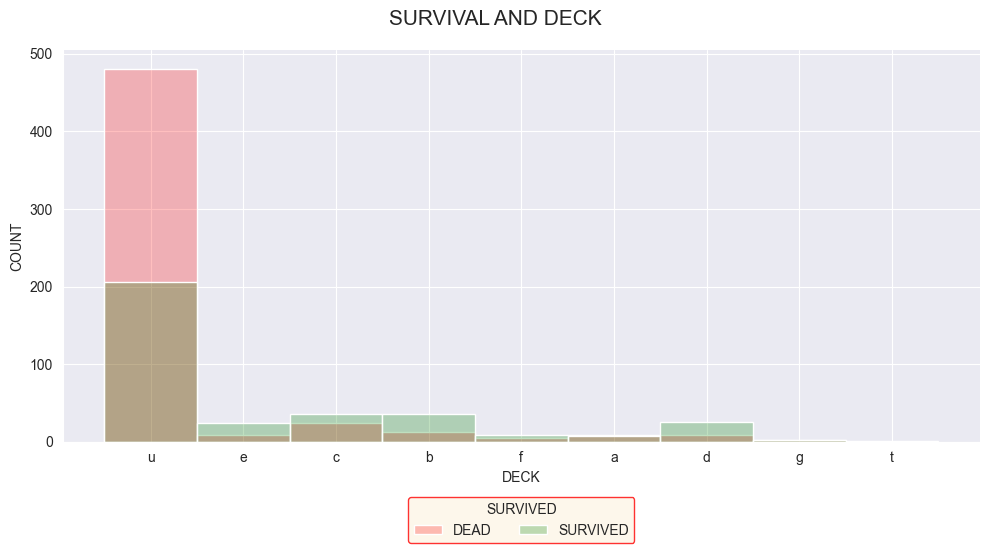

In [477]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 
               'deck',
               alpha=0.25)
facet_grid.fig.suptitle('SURVIVAL AND DECK', fontsize=15)
facet_grid.set_axis_labels("DECK", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)
plt.legend(('DEAD', 'SURVIVED'),
           title='SURVIVED', loc='center', 
           edgecolor = 'r',
           facecolor = 'oldlace',
           bbox_to_anchor=(0.5, -0.2),
           ncol=2)
plt.show();

#### IS_NUMBER_OF_CABIN

In [478]:
train['is_number_of_cabin'] = train['cabin'].apply(lambda x: 0 if x == 'u' else 1)
test['is_number_of_cabin'] = test['cabin'].apply(lambda x: 0 if x == 'u' else 1)

In [479]:
print('SURVIVAL PERCENTAGE FOR IS NUMBER CABIN')
print('='*100)
train.groupby('is_number_of_cabin')['survived'].mean()

SURVIVAL PERCENTAGE FOR IS NUMBER CABIN


is_number_of_cabin
0    0.299854
1    0.666667
Name: survived, dtype: float64

### TICKET

In [480]:
train['ticket_series'] = train['ticket'].apply(lambda x: 'numeric' if x.isnumeric() 
                                               else (re.sub(r'[^\w\s]','', x)).split()[0])
test['ticket_series'] = test['ticket'].apply(lambda x: 'numeric' if x.isnumeric() 
                                               else (re.sub(r'[^\w\s]','', x)).split()[0])

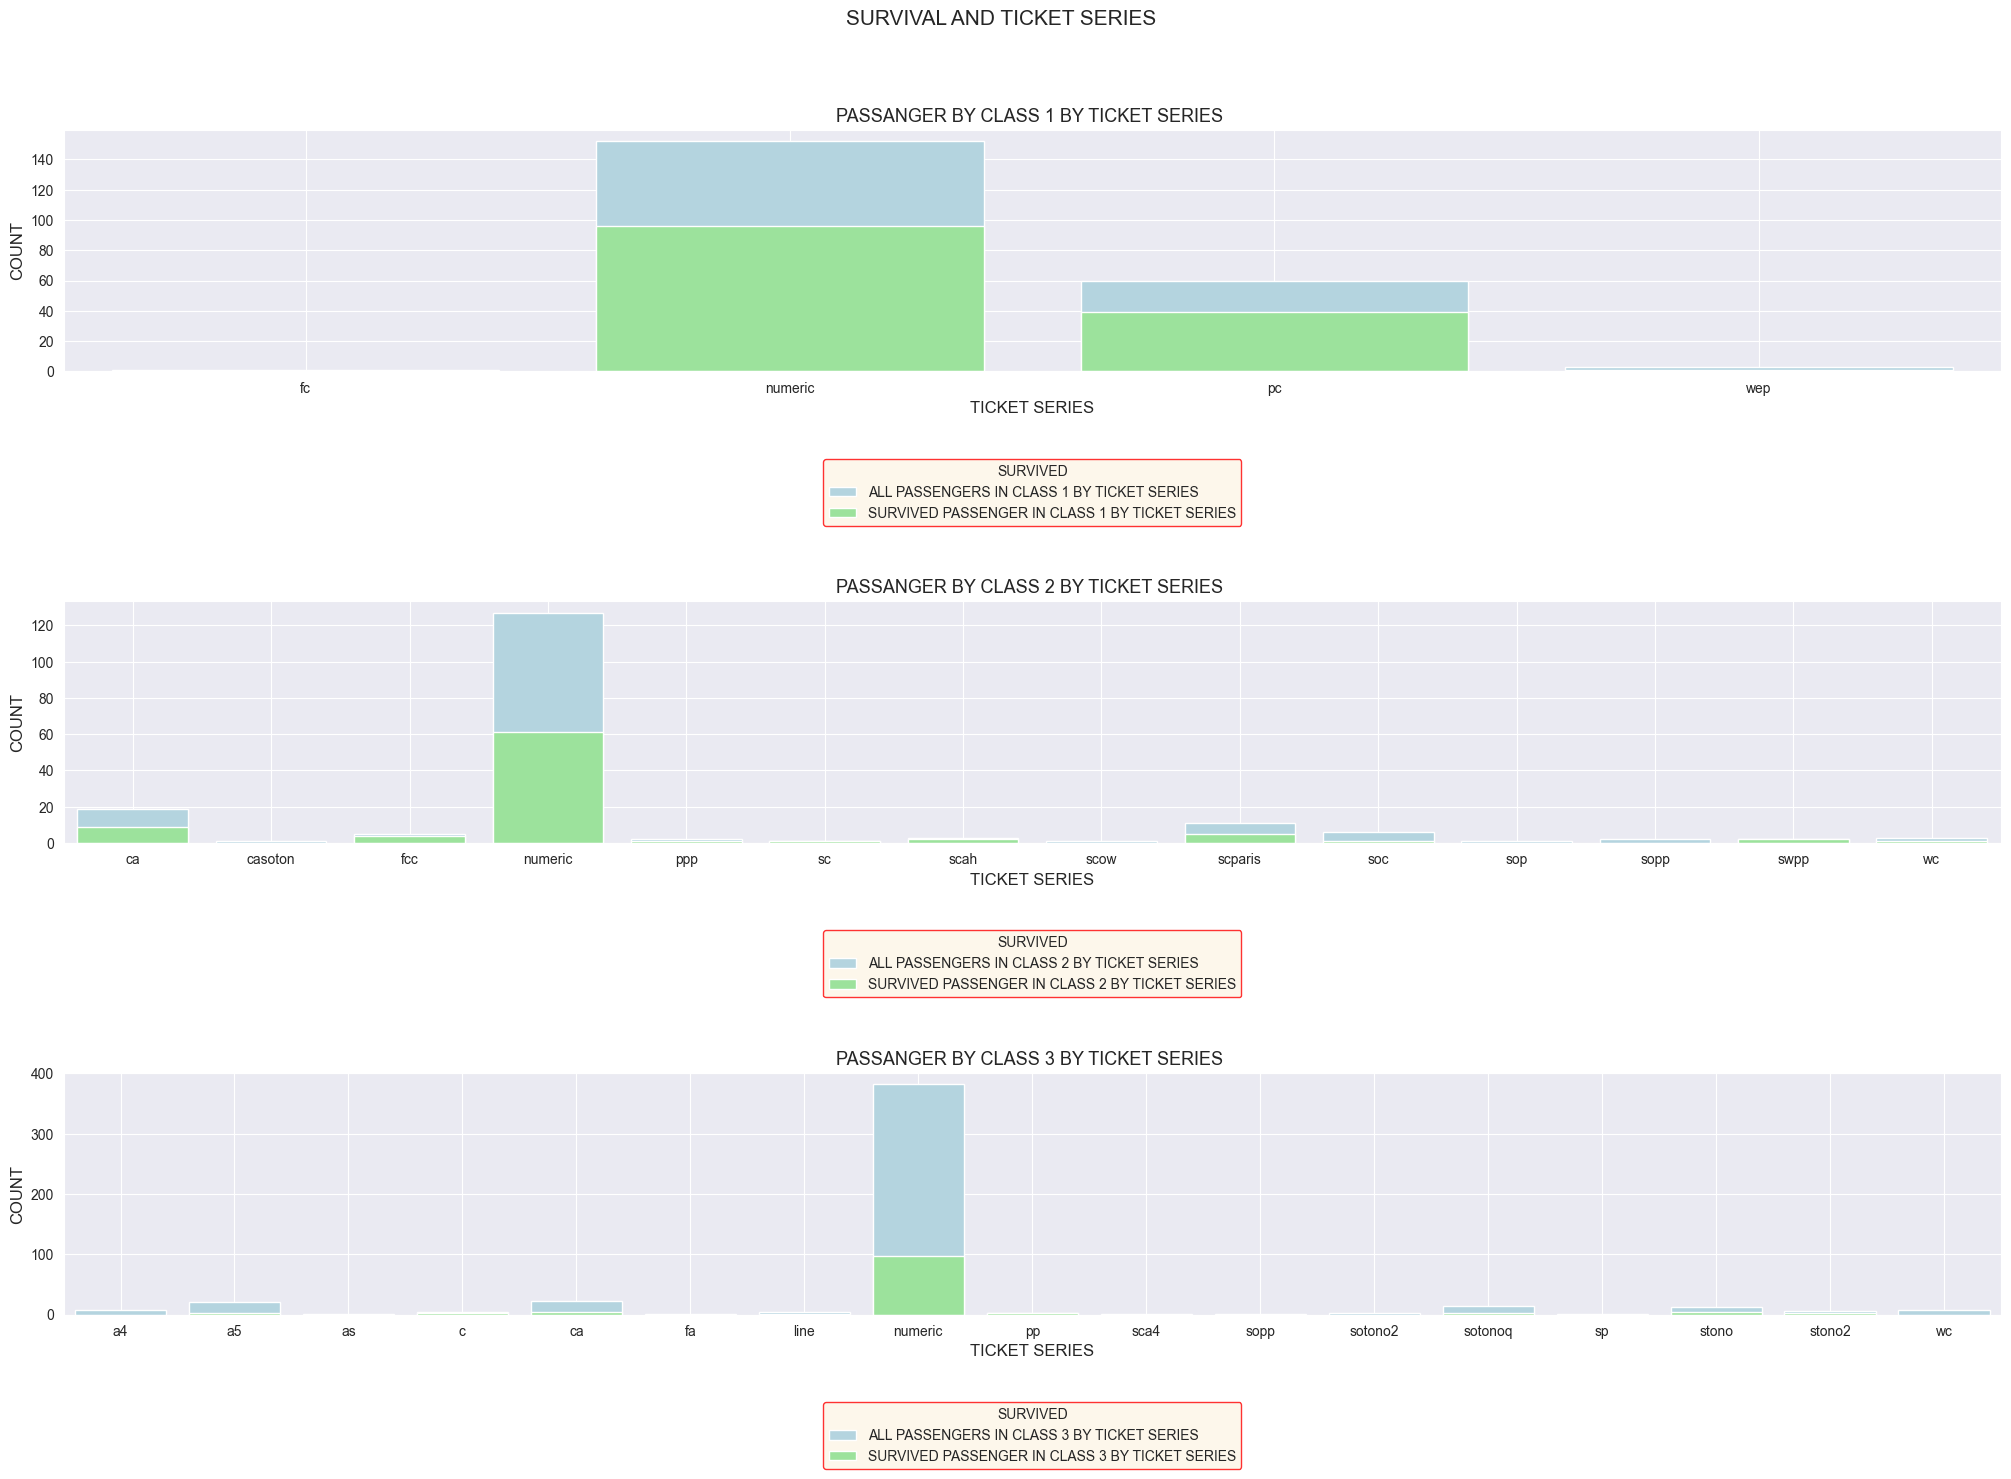

In [481]:
position = 0 
plt.figure(figsize=[25, 15])
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.95)
plt.suptitle('SURVIVAL AND TICKET SERIES', fontsize=15)
for pclass in [1,2,3]:
    position += 1
    plt.subplot(3, 1, position)
    plt.title(f'PASSANGER BY CLASS {pclass} BY TICKET SERIES ', fontsize=13)
    sns.set_style('darkgrid')
    sns.barplot(data=train[train['pclass'] == pclass].groupby('ticket_series')['survived'].count().reset_index(),
                x='ticket_series',
                y='survived',
                color='lightblue',
                label = f"ALL PASSENGERS IN CLASS {pclass} BY TICKET SERIES ")
    plt.grid(True)
    plt.ylabel('COUNT', fontsize=12)
    plt.xlabel('TICKET SERIES', fontsize=12)
    sns.barplot(data=train[(train['survived'] == 1) & (train['pclass'] == pclass)].groupby('ticket_series')['survived'].count().reset_index(),
                x='ticket_series',
                y='survived',
                color='lightgreen',
                label = f"SURVIVED PASSENGER IN CLASS {pclass} BY TICKET SERIES")
    plt.grid(True)
    plt.ylabel('COUNT', fontsize=12)
    plt.xlabel('TICKET SERIES', fontsize=12)
    plt.legend(title=f'SURVIVED', 
                       loc='center', 
                       edgecolor = 'r',
                       facecolor = 'oldlace',
                       bbox_to_anchor=(0.5, -0.5))
plt.grid(True);

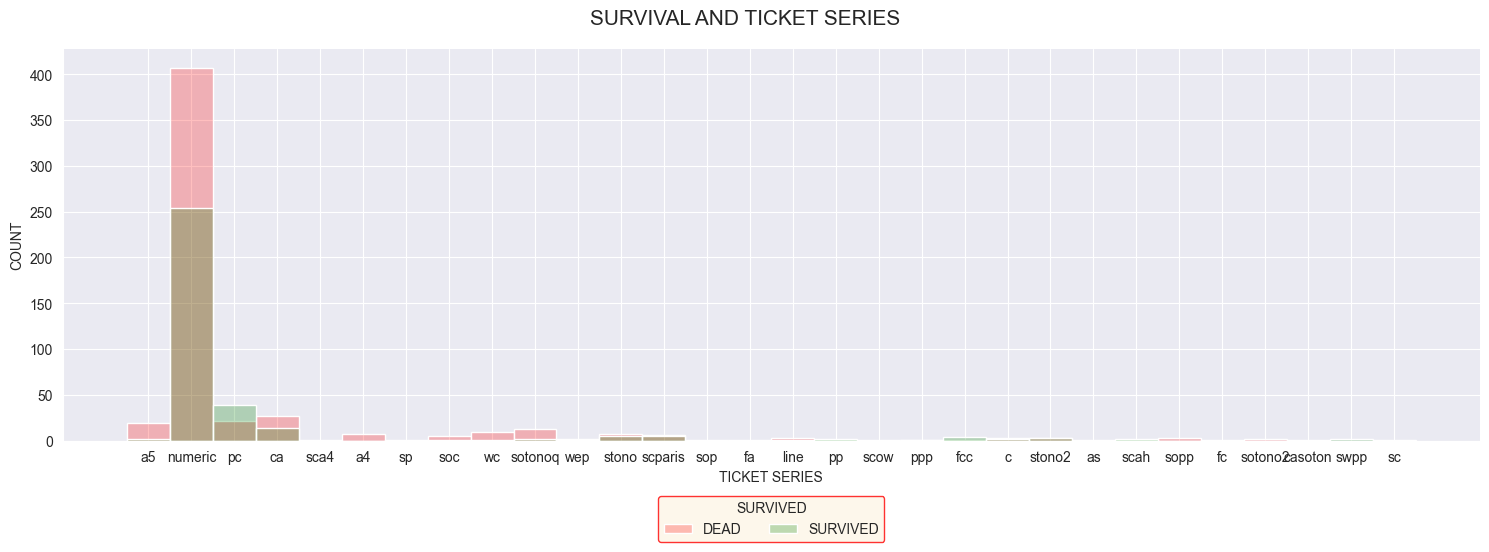

In [482]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=3, palette=['red', 'green'])
facet_grid.map(sns.histplot, 
               'ticket_series',
               alpha=0.25)
facet_grid.fig.suptitle('SURVIVAL AND TICKET SERIES', fontsize=15)
facet_grid.set_axis_labels("TICKET SERIES", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)
plt.legend(('DEAD', 'SURVIVED'),
           title='SURVIVED', loc='center', 
           edgecolor = 'r',
           facecolor = 'oldlace',
           bbox_to_anchor=(0.5, -0.2),
           ncol=2)
plt.show();

### EMBARKED

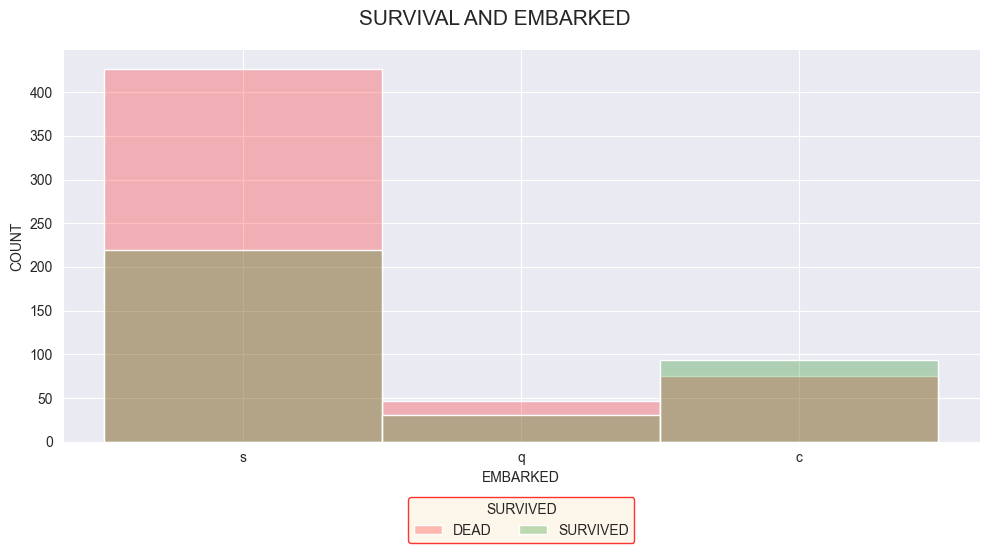

In [483]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 
               'embarked',
               alpha=0.25)
facet_grid.fig.suptitle('SURVIVAL AND EMBARKED', fontsize=15)
facet_grid.set_axis_labels("EMBARKED", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)
plt.legend(("DEAD", "SURVIVED"),
           title='SURVIVED', loc='center', 
           edgecolor = 'r',
           facecolor = 'oldlace',
           bbox_to_anchor=(0.5, -0.2),
           ncol=2)
plt.show();

### TITLE

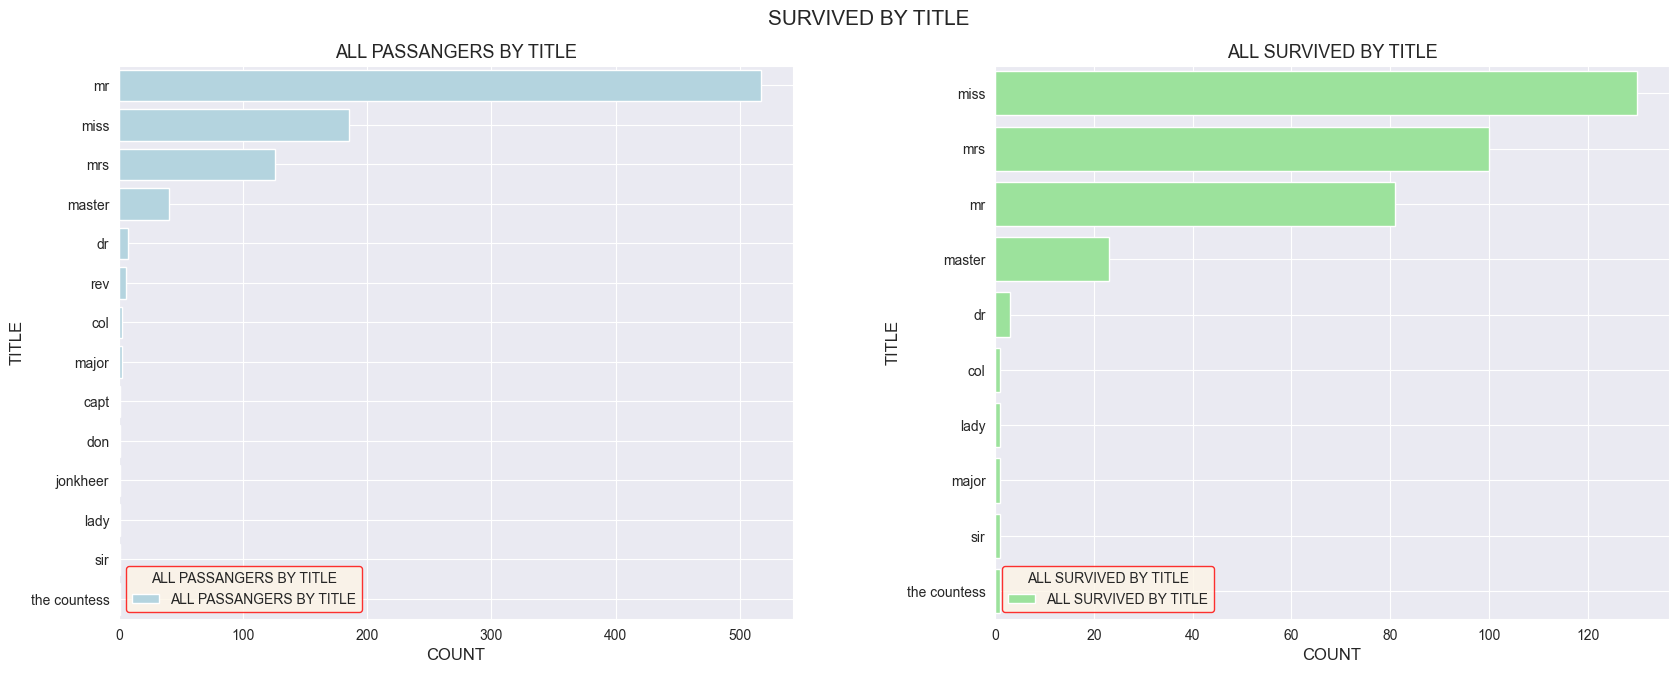

In [484]:
position = 0
plt.figure(figsize=[20, 7])
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.90)
plt.suptitle('SURVIVED BY TITLE', fontsize=15)
position +=1
plt.subplot(1, 2, position)
plt.title('ALL PASSANGERS BY TITLE', fontsize=13)
sns.set_style('darkgrid')
sns.barplot(data=train[['title', 'survived']].groupby('title')['survived'].count().reset_index().sort_values(by='survived', ascending=False),
            x='survived', 
            y='title',
            color='lightblue',
            orient='h',
            label = "ALL PASSANGERS BY TITLE")
plt.ylabel('TITLE', fontsize=12)
plt.xlabel('COUNT', fontsize=12)
plt.grid(True)
plt.legend(title='ALL PASSANGERS BY TITLE',
           edgecolor = 'r',
           facecolor = 'oldlace')
position +=1
plt.subplot(1, 2, position)
plt.title('ALL SURVIVED BY TITLE', fontsize=13)
sns.set_style('darkgrid')
sns.barplot(data=train[(train['survived'] == 1)][['title', 'survived']].groupby('title')['survived'].count().reset_index().sort_values(by='survived', ascending=False),
            x='survived', 
            y='title',
            color='lightgreen', 
            orient='h',
            label = "ALL SURVIVED BY TITLE")
plt.ylabel('TITLE', fontsize=12)
plt.xlabel('COUNT', fontsize=12)
plt.grid(True)
plt.legend(title='ALL SURVIVED BY TITLE',
           edgecolor = 'r',
           facecolor = 'oldlace');

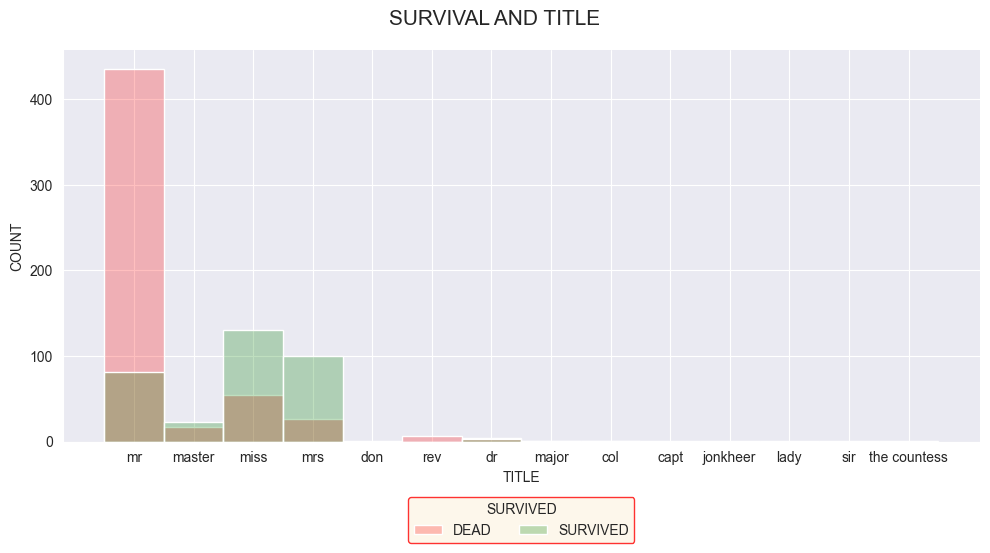

In [485]:
facet_grid = sns.FacetGrid(train, hue='survived', height=5, aspect=2, palette=['red', 'green'])
facet_grid.map(sns.histplot, 
               'title',
               alpha=0.25)
facet_grid.fig.suptitle('SURVIVAL AND TITLE', fontsize=15)
facet_grid.set_axis_labels("TITLE", "COUNT")
facet_grid.fig.subplots_adjust(top=0.90)
plt.legend(("DEAD", "SURVIVED"),
           title='SURVIVED', loc='center', 
           edgecolor = 'r',
           facecolor = 'oldlace',
           bbox_to_anchor=(0.5, -0.2),
           ncol=2)
plt.show();

## DATA PREPARATION

### Discard unnecessary

In [486]:
train_for_cat = train.copy()
test_for_cat = test.copy()

In [487]:
train.drop(['passenger_id', 'name', 'ticket', 'ticket_series'], axis=1, inplace=True)
test.drop(['passenger_id', 'name', 'ticket', 'ticket_series'], axis=1, inplace=True)

### SELECT BEST FEATURES

In [488]:
train_for_matrix = train.copy()

In [489]:
encoder = OrdinalEncoder()
train_for_matrix[['title', 'cabin']] = encoder.fit_transform(train_for_matrix[['title', 'cabin']])
train_for_matrix = pd.get_dummies(train_for_matrix, columns=['sex', 'embarked'])
train_for_matrix['deck'].replace({'a': 8, 'b': 7, 'c': 6, 'd':5 , 'e': 4, 'f': 3, 'g':2, 't':1 ,'u': 0}, inplace=True)

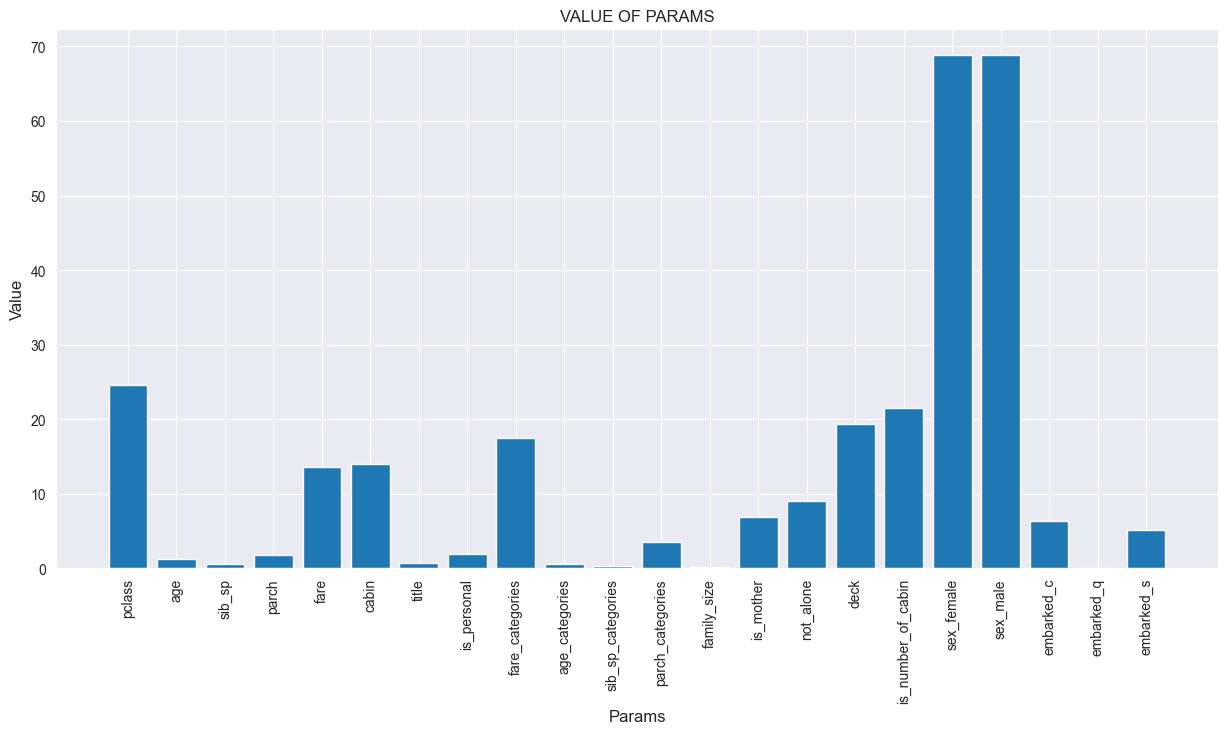

In [490]:
plt.figure(figsize=(15, 7))
plt.title('VALUE OF PARAMS', fontsize=12)
selector = SelectKBest(f_classif, k='all')
selector.fit(train_for_matrix[train_for_matrix.drop('survived', axis=1).columns.to_list()],
             train_for_matrix["survived"])
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(train_for_matrix.drop('survived', axis=1).columns.to_list())), scores)
plt.xticks(range(len(train_for_matrix.drop('survived', axis=1).columns.to_list())),
           train_for_matrix.drop('survived', axis=1).columns.to_list(),
           rotation='vertical')
plt.ylabel('Value', fontsize=12)
plt.xlabel('Params', fontsize=12)
plt.grid(True)
sns.set_style('darkgrid')
plt.show(True);

### CORRELATION MATRIX

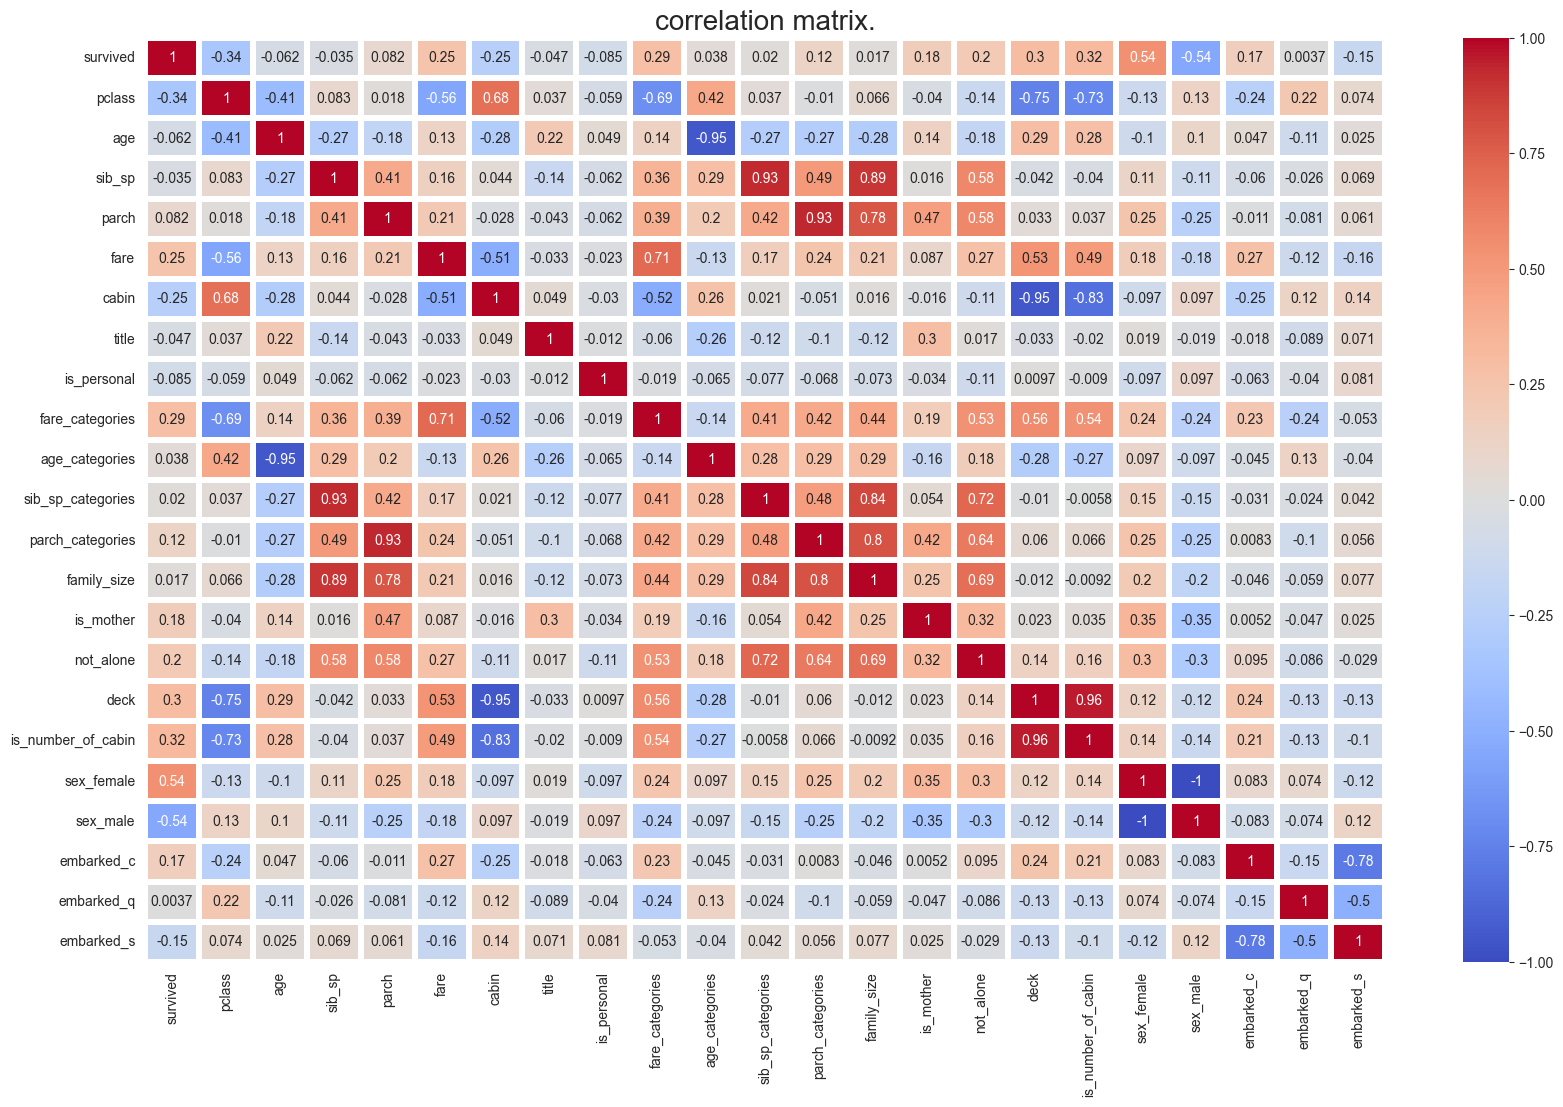

In [491]:
fig, ax = plt.subplots(figsize=(20,12))
plt.title('correlation matrix.', fontsize=20)
sns.heatmap(train_for_matrix.corr(), annot=True, cmap="coolwarm",  fmt='.2g', linewidth=4)
plt.grid(True);

In [492]:
del train_for_matrix, encoder

In [493]:
train.drop(['is_mother', 'not_alone', 'title', 'cabin', 'family_size','parch_categories', 'sib_sp_categories', 'age_categories', 'fare_categories',  'deck', 'is_number_of_cabin', 'is_personal'], axis=1, inplace=True)
test.drop( ['is_mother', 'not_alone', 'title', 'cabin', 'family_size','parch_categories', 'sib_sp_categories', 'age_categories',  'fare_categories',  'deck', 'is_number_of_cabin', 'is_personal'], axis=1, inplace=True)

In [494]:
train = pd.get_dummies(train, columns=['sex', 'embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['sex', 'embarked'], drop_first=True)

In [495]:
features = train.drop('survived', axis=1)
target = train['survived']

### VALUE OF PARAMS FOR CAT

In [496]:
features_for_cat = train_for_cat.drop('survived', axis=1)
target_for_cat = train_for_cat['survived']

In [497]:
features_index = np.where(features_for_cat.dtypes != float)[0]

In [498]:
cat = CatBoostClassifier(loss_function='Logloss',
                         eval_metric='Accuracy',
                         random_seed=42,
                         verbose=False)

cat.fit(features_for_cat, target_for_cat, cat_features=features_index)

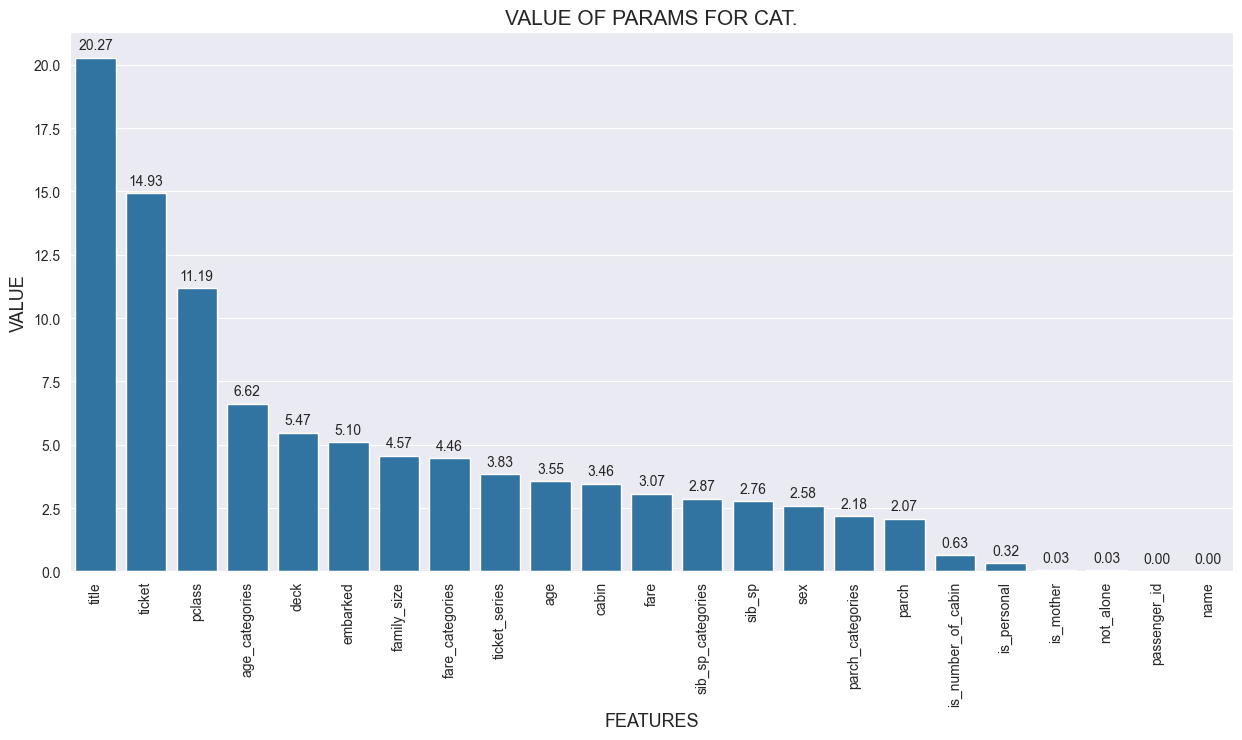

In [499]:
importances_features_for_cat = cat.get_feature_importance(Pool(features_for_cat, target_for_cat, cat_features=features_index), prettified = True)

plt.figure(figsize=[15, 7])
sns.set_style('darkgrid')
plt.title('VALUE OF PARAMS FOR CAT.', fontsize=15)
splot = sns.barplot(x='Feature Id', y='Importances', data=importances_features_for_cat.reset_index())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('VALUE', fontsize=13)
plt.xlabel('FEATURES', fontsize=13)
plt.xticks(rotation=90);

In [500]:
features_for_cat.drop(['cabin', 'family_size', 'passenger_id', 'name',  'parch_categories', 'sib_sp_categories', 'age_categories', 'fare_categories', 'is_mother', 'is_number_of_cabin',  'not_alone', 'is_personal', 'ticket_series'], axis=1, inplace=True)
test_for_cat.drop( ['cabin', 'family_size', 'passenger_id', 'name',  'parch_categories', 'sib_sp_categories', 'age_categories', 'fare_categories', 'is_mother', 'is_number_of_cabin',  'not_alone', 'is_personal', 'ticket_series'], axis=1, inplace=True)

In [501]:
del cat, features_index

### TARGET ATTRIBUTE BALANCE

In [502]:
# plt.figure(figsize=[15, 5])
# plt.title('TARGET ATTRIBUTE BALANCE.', fontsize=15)
# sns.set_style('darkgrid')
# sns.barplot(data=train['survived'].value_counts().reset_index().rename(columns={'index':'survived', 'survived': 'count'}),
#             x='survived',
#             y='count',
#             hue='survived',
#             palette=['red', 'green'])
# plt.ylabel('COUNT', fontsize=13)
# plt.xlabel('CLASS', fontsize=13)
# plt.grid(True)
# negative_class = train['survived'].value_counts(normalize=True)[0]
# positive_class = train['survived'].value_counts(normalize=True)[1]
# plt.legend(title=f'Negative class - {negative_class:.2f}%, Positive class - {positive_class:.2f}%',
#            loc='center', 
#            edgecolor = 'r',
#            facecolor = 'oldlace',
#            bbox_to_anchor=(0.5, -0.25))
# plt.show();

## PREPARATION FOR TRAINING AND TEST

In [503]:
x_train, x_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.15, 
                                                    random_state=12345)

In [504]:
x_train_for_cat, x_test_for_cat, y_train_for_cat, y_test_for_cat = train_test_split(features_for_cat,
                                                                                    target_for_cat,
                                                                                    test_size=0.15,
                                                                                    random_state=12345)

In [505]:
cat_features_index = np.where(features_for_cat.dtypes != float)[0]
print('CAT FEATURES INDEX:', cat_features_index)

CAT FEATURES INDEX: [0 1 3 4 5 7 8 9]


In [506]:
features_for_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       891 non-null    float64
 3   sib_sp    891 non-null    int64  
 4   parch     891 non-null    int64  
 5   ticket    891 non-null    object 
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   title     891 non-null    object 
 9   deck      891 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [507]:
print(f'SIZE TRAIN FEATURES - {x_train.shape}, SIZE TEST FEATURES - {x_test.shape}')
print(f'SIZE TRAIN TARGET - {y_train.shape}, SIZE TEST TARGET - {y_test.shape}')

SIZE TRAIN FEATURES - (757, 8), SIZE TEST FEATURES - (134, 8)
SIZE TRAIN TARGET - (757,), SIZE TEST TARGET - (134,)


In [508]:
print(f'SIZE CATS TRAIN FEATURES - {x_train_for_cat.shape}, SIZE CATS TEST FEATURES - {x_test_for_cat.shape}')
print(f'SIZE CATS TRAIN TARGET - {y_train_for_cat.shape}, SIZE CATS  TEST TARGET - {y_test_for_cat.shape}')

SIZE CATS TRAIN FEATURES - (757, 10), SIZE CATS TEST FEATURES - (134, 10)
SIZE CATS TRAIN TARGET - (757,), SIZE CATS  TEST TARGET - (134,)


In [509]:
del train, train_for_cat

## PREPARATION OF MODELS

In [510]:
dct_with_models = {}

In [511]:
%%time
for label_model, model in {'RF': [RandomForestClassifier(random_state=12345), 'no_scaler'],
                           'DT': [DecisionTreeClassifier(random_state=12345), 'no_scaler'],
                           'LR': [LogisticRegression(random_state=12345), 'need_scaler'],
                           'KNB': [KNeighborsClassifier(), 'need_scaler'],
                           'SVC': [SVC(random_state=12345, probability=True), 'need_scaler'],
                           'CAT': [CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy',
                                   verbose=False, use_best_model=True, random_seed=42), 'cat']}.items():
    
    
    
    if model[1] == 'need_scaler':
        scaled_features = StandardScaler().fit_transform(features)
        scores = cross_val_score(model[0], scaled_features, target, cv=9, scoring='accuracy')
        scaler = StandardScaler()
        scaled_train = scaler.fit_transform(x_train)
        scaled_test = scaler.transform(x_test)
        model[0].fit(scaled_train, y_train)
        dct_with_models[f'{label_model}_overall_accuracy_for_model_for_dataset'] = np.mean(scores)
        dct_with_models[f'{label_model}_accuracy_for_x_test_with_default_params'] = accuracy_score(y_test, model[0].predict(scaled_test))    
        dct_with_models[f'{label_model}_roc_auc_for_x_test_with_default_params'] = roc_auc_score(y_test, model[0].predict_proba(scaled_test)[:,1])
        
    elif model[1] == 'no_scaler':
        scores = cross_val_score(model[0], features, target, cv=9, scoring='accuracy')
        model[0].fit(x_train, y_train)
        dct_with_models[f'{label_model}_overall_accuracy_for_model_for_dataset'] = np.mean(scores)
        dct_with_models[f'{label_model}_accuracy_for_x_test_with_default_params'] = accuracy_score(y_test, model[0].predict(x_test))    
        dct_with_models[f'{label_model}_roc_auc_for_x_test_with_default_params'] = roc_auc_score(y_test, model[0].predict_proba(x_test)[:,1])
    
    elif model[1] == 'cat':
        scores = cv(Pool(features_for_cat, target_for_cat, cat_features=cat_features_index),
                    {"loss_function": "Logloss",
                     "eval_metric": "Accuracy",
                     "verbose": False,
                     "random_seed": 42},
                    fold_count=10)       
        model[0].fit(x_train_for_cat, y_train_for_cat,
                     cat_features=cat_features_index,
                     eval_set=(x_test_for_cat, y_test_for_cat),
                     verbose=True,
                     plot=False)
        dct_with_models[f'{label_model}_overall_accuracy_for_model_for_dataset'] = scores['test-Accuracy-mean'].mean()
        dct_with_models[f'{label_model}_accuracy_for_x_test_with_default_params'] = accuracy_score(y_test_for_cat, model[0].predict(x_test_for_cat))    
        dct_with_models[f'{label_model}_roc_auc_for_x_test_with_default_params'] = roc_auc_score(y_test_for_cat, model[0].predict_proba(x_test_for_cat)[:,1])  

Training on fold [0/10]

bestTest = 0.8333333333
bestIteration = 338

Training on fold [1/10]

bestTest = 0.8555555556
bestIteration = 868

Training on fold [2/10]

bestTest = 0.9325842697
bestIteration = 65

Training on fold [3/10]

bestTest = 0.8651685393
bestIteration = 80

Training on fold [4/10]

bestTest = 0.8539325843
bestIteration = 396

Training on fold [5/10]

bestTest = 0.8426966292
bestIteration = 45

Training on fold [6/10]

bestTest = 0.7865168539
bestIteration = 74

Training on fold [7/10]

bestTest = 0.8202247191
bestIteration = 262

Training on fold [8/10]

bestTest = 0.8539325843
bestIteration = 24

Training on fold [9/10]

bestTest = 0.8522727273
bestIteration = 443

Learning rate set to 0.029583
0:	learn: 0.8084544	test: 0.7313433	best: 0.7313433 (0)	total: 50.4ms	remaining: 50.3s
1:	learn: 0.8269485	test: 0.7910448	best: 0.7910448 (1)	total: 109ms	remaining: 54.4s
2:	learn: 0.8428005	test: 0.7835821	best: 0.7910448 (1)	total: 169ms	remaining: 56s
3:	learn: 0.841479

In [512]:
model = []
overall_accuracy_for_dataset = []
accuracy_for_x_test_with_default_params = []
roc_auc_for_x_test_with_default_params = []

for name_model in ['DT', 'RF', 'LR', 'KNB', 'SVC', 'CAT']:
    model.append(name_model)
    overall_accuracy_for_dataset.append(dct_with_models[f'{name_model}_overall_accuracy_for_model_for_dataset'])
    accuracy_for_x_test_with_default_params.append(dct_with_models[f'{name_model}_accuracy_for_x_test_with_default_params'])
    roc_auc_for_x_test_with_default_params.append(dct_with_models[f'{name_model}_roc_auc_for_x_test_with_default_params'])

In [513]:
results = {
    'Model' : model,
    'OVERALL ACCURACY FOR TRAIN DATASET' : pd.Series(overall_accuracy_for_dataset),
    'ROC_AUC FOR X_TEST WITH DEFAULT PARAMS' : pd.Series(roc_auc_for_x_test_with_default_params),
    'ACCURACY FOR X_TEST WITH DEFAULT PARAMS' : pd.Series(accuracy_for_x_test_with_default_params)}

display(pd.DataFrame(results).style.highlight_max(color='green'))

,Model,OVERALL ACCURACY FOR TRAIN DATASET,ROC_AUC FOR X_TEST WITH DEFAULT PARAMS,ACCURACY FOR X_TEST WITH DEFAULT PARAMS
0,DT,0.767677,0.691898,0.716418
1,RF,0.817059,0.809838,0.776119
2,LR,0.799102,0.815972,0.783582
3,KNB,0.806958,0.831829,0.783582
4,SVC,0.827160,0.851852,0.798507
5,CAT,0.828038,0.813773,0.805970


In [514]:
del dct_with_models, model, overall_accuracy_for_dataset, accuracy_for_x_test_with_default_params, roc_auc_for_x_test_with_default_params, scaled_features

### FIND BEST PARAMS FOR MODELS AND TEST

In [515]:
%%time
for label_model, model in {'RF': {'classifier': [RandomForestClassifier(random_state=12345)],
                                  'preprocessing': [None],
                                  'classifier__n_estimators': [48,49,50,51,52,53,100],
                                  'classifier__max_depth': [3,4,5,6,7,8],
                                  'classifier__min_samples_split': [1,2,3,4],
                                  'classifier__min_samples_leaf': [1,2,3,4],
                                  'classifier__criterion': ['gini', 'entropy']},
                           'DT': {'classifier': [DecisionTreeClassifier(random_state=12345)],
                                  'preprocessing': [None],
                                  'classifier__max_depth': [2,4,6,8,10],
                                  'classifier__splitter': ['best', 'random'], 
                                  'classifier__min_samples_leaf': [1,5,10],
                                  'classifier__criterion': ['gini', 'entropy']},
                           'LR': {'classifier': [LogisticRegression(random_state=12345)],
                                  'preprocessing': [StandardScaler(), None],
                                  'classifier__C': [0.001,0.01,0.1,1,10],
                                  'classifier__max_iter': [100,150,200]},
                           'KNB': {'classifier': [KNeighborsClassifier()],
                                   'preprocessing': [StandardScaler(), None],
                                   'classifier__weights': ['uniform', 'distance'], 
                                   'classifier__p': [1,2], 
                                   'classifier__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                   'classifier__leaf_size': [10,20,30,40,50],
                                   'classifier__metric': ['minkowski', 'chebyshev'],
                                   'classifier__n_neighbors': [5,10,15,20,30,50]},
                           'SVC': {'classifier': [SVC(random_state=12345, probability=True)],
                                   'preprocessing': [StandardScaler(), None], 
                                   'classifier__gamma': [0.001,0.01,0.1,1,10],
                                   'classifier__C': [0.001,0.01,0.1,1,10]}}.items():
    
    pipe = Pipeline([('preprocessing', None), ('classifier', None)])
    grid = GridSearchCV(pipe, model, cv=5, scoring='accuracy')
    grid.fit(x_train, y_train)
    dct_with_models_param[f'{label_model}_params'] = grid.best_params_
    dct_with_models_param[f'{label_model}_accuracy_train_with_best_params'] = grid.best_score_
    dct_with_models_param[f'{label_model}_accuracy_for_test_with_best_params'] = accuracy_score(y_test, grid.predict(x_test))    
    dct_with_models_param[f'{label_model}_roc_auc_for_test_with_best_params'] = roc_auc_score(y_test, grid.predict_proba(x_test)[:,1])

NameError: name 'dct_with_models_param' is not defined

In [516]:
%%time
cat_for_search = CatBoostClassifier(loss_function='Logloss',
                                    eval_metric='Accuracy',
                                    verbose=False,
                                    random_state=12345)

params = {'depth': [2,3,4,5,6,7,8,9,10]}

grid = cat_for_search.grid_search(params, Pool(features_for_cat, target_for_cat, cat_features=cat_features_index),
                                  shuffle=True, cv=5, verbose=False,  plot=False)

dct_with_models_param['CAT_params'] = grid['params']
cat = CatBoostClassifier(depth=dct_with_models_param['CAT_params']['depth'],
                         loss_function='Logloss',
                         eval_metric='Accuracy',
                         verbose=False,
                         random_seed=42,
                         use_best_model=True)
cat.fit(x_train_for_cat, y_train_for_cat,
        cat_features=cat_features_index,
        eval_set = (x_test_for_cat, y_test_for_cat))

dct_with_models_param['CAT_accuracy_train_with_best_params'] = cat.get_best_score()['validation']['Accuracy']                      
dct_with_models_param['CAT_accuracy_for_test_with_best_params'] = accuracy_score(y_test, cat.predict(x_test_for_cat))
dct_with_models_param['CAT_roc_auc_for_test_with_best_params'] = roc_auc_score(y_test, cat.predict_proba(x_test_for_cat)[:,1])


bestTest = 0.8379888268
bestIteration = 273


bestTest = 0.8324022346
bestIteration = 201


bestTest = 0.8324022346
bestIteration = 157


bestTest = 0.8324022346
bestIteration = 246


bestTest = 0.8212290503
bestIteration = 112


bestTest = 0.8268156425
bestIteration = 178


bestTest = 0.8324022346
bestIteration = 223


bestTest = 0.8324022346
bestIteration = 257


bestTest = 0.8324022346
bestIteration = 242

Training on fold [0/5]

bestTest = 0.8379888268
bestIteration = 175

Training on fold [1/5]

bestTest = 0.9106145251
bestIteration = 883

Training on fold [2/5]

bestTest = 0.8651685393
bestIteration = 109

Training on fold [3/5]

bestTest = 0.7808988764
bestIteration = 62

Training on fold [4/5]

bestTest = 0.8361581921
bestIteration = 268



NameError: name 'dct_with_models_param' is not defined

In [517]:
del x_train, y_train, x_test, y_test, cat_for_search, grid, cat, pipe, params

NameError: name 'cat' is not defined

### RESULT

In [ ]:
model = []
accuracy_train_with_best_params = []
accuracy_for_test_with_best_params = []
roc_auc_for_test_with_best_params = []

for name_model in ['DT', 'RF', 'LR', 'KNB', 'SVC', 'CAT']:
    model.append(name_model)
    accuracy_train_with_best_params.append(dct_with_models_param[f'{name_model}_accuracy_train_with_best_params'])
    accuracy_for_test_with_best_params.append(dct_with_models_param[f'{name_model}_accuracy_for_test_with_best_params'])
    roc_auc_for_test_with_best_params.append(dct_with_models_param[f'{name_model}_roc_auc_for_test_with_best_params'])

In [ ]:
results = {
    'Model' : model,
    'ACCURACY FOR TRAIN WITH BEST PARAMS' : pd.Series(accuracy_train_with_best_params),
    'ROC_AUC FOR TEST WITH BEST PARAMS' : pd.Series(roc_auc_for_test_with_best_params),
    'ACCURACY FOR TEST WITH BEST PARAMS' : pd.Series(accuracy_for_test_with_best_params)}

display(pd.DataFrame(results).style.highlight_max(color='green'))

## BEST THRESHOLD

In [ ]:
best_model = CatBoostClassifier(depth=dct_with_models_param['CAT_params']['depth'],
                                loss_function='Logloss',
                                eval_metric='Accuracy',
                                use_best_model=True,
                                random_seed=42,
                                verbose=False)

best_model.fit(x_train_for_cat, y_train_for_cat,
               cat_features=cat_features_index,
               eval_set = (x_test_for_cat, y_test_for_cat))

In [ ]:
# predictions = best_model.predict(x_test_for_cat)
# probalities = best_model.predict_proba(x_test_for_cat)
# probalities_one = probalities[:,1]

# plt.figure(figsize=[10, 7])
# plt.title('PRECISIONS, RECALLS VS THRESHOLDS.', fontsize=15)
# precisions, recalls, thresholds = precision_recall_curve(y_test_for_cat, probalities_one)
# plt.plot(thresholds, precisions[:-1], 'b--', label='PRECISIONS')
# plt.plot(thresholds, recalls[:-1],'g-', label='RECALLS')
# plt.plot(thresholds, precisions[:-1], 'o', label='THRESHOLD FOR PRECISIONS', markersize=5)
# plt.plot(thresholds, recalls[:-1],'o', label='THRESHOLD FOR RECALLS', markersize=5)
# plt.axvline(x=0.531, color='r', linestyle='--', alpha=0.5, linewidth=0.6)
# plt.axvline(x=0.538, color='r', linestyle='--', alpha=0.5, linewidth=0.6)
# plt.axhline(y=0.50, color='r', linestyle='--', alpha=0.5, linewidth=0.6)
# plt.axhline(y=0.56, color='r', linestyle='--', alpha=0.5, linewidth=0.6)

# plt.axhline(y=0.855, color='r', linestyle='--', alpha=0.5, linewidth=0.6)
# plt.axhline(y=0.868, color='r', linestyle='--', alpha=0.5, linewidth=0.6)
# sns.set_style('darkgrid')
# plt.ylabel('VALUE', fontsize=13)
# plt.xlabel('THRESHOLDS', fontsize=13)
# plt.grid(True)
# plt.legend(edgecolor = 'r',
#            facecolor = 'oldlace')
# plt.show();

In [ ]:
# plt.figure(figsize=[10, 5])
# plt.title('PR-CURVE.', fontsize=15)

# probalities = best_model.predict_proba(x_test_for_cat)
# probalities_one = probalities[:,1]
# for threshold in np.arange(0.53, 0.538, 0.001):
#     predicted_valid = probalities_one > threshold
#     precisions, recalls, thresholds = precision_recall_curve(y_test_for_cat, predicted_valid)
#     average_score = average_precision_score(y_test_for_cat, predicted_valid)
#     plt.step(precisions,
#              recalls,
#              label=f"THRESHOLD - {threshold}, AVERAGE SCORE = {average_score:.2f}",
#              where='post')
# sns.set_style('darkgrid')
# plt.grid(True)
# plt.xlabel('PRECISIONS', fontsize=15)
# plt.ylabel('RECALLS', fontsize=15)
# plt.legend(edgecolor = 'r',
#            facecolor = 'oldlace')
# plt.show();

In [ ]:
# plt.figure(figsize=[10, 5])
# plt.title('ROC CURVE', fontsize=15)
# predictions = best_model.predict(x_test_for_cat)
# probalities = best_model.predict_proba(x_test_for_cat)
# probalities_one = probalities[:,1]
# predicted_valid = probalities_one > 0.534
# auc_roc = roc_auc_score(predictions, predicted_valid)
# plt.plot([0,1],[0,1], linestyle ='--', label='CONSTANT MODEL')
# fpr, tpr, all_thresholds = roc_curve(y_test_for_cat, predicted_valid)
# plt.text((fpr[1] + 0.02),(tpr[1] + 0.02), 
#          f'THRESHOLD - 0.534, FPR - {fpr[1]:.2f}, TPR - {tpr[1]:.2f}',
#          color='r',
#          fontsize=16)
# plt.plot(fpr[1],tpr[1], 
#          'o',
#          color='r',
#          label=f'THRESHOLD - 0.534', markersize=10)
# plt.axvline(x=fpr[1], color='r', linestyle='--')
# plt.axhline(y=tpr[1], color='r', linestyle='--')
# plt.plot(fpr, tpr, label=f'ROC-CURVE')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('FPR', fontsize=15)
# plt.ylabel('TPR', fontsize=15)
# plt.legend(edgecolor = 'r',
#            facecolor = 'oldlace')
# plt.show()

## TEST BEST MODEL

In [ ]:
probalities = best_model.predict_proba(test_for_cat)
probalities_one = probalities[:,1]
predicted_valid = probalities_one > 0.534
predictions = predicted_valid.astype(np.int)
output = pd.DataFrame(data={'PassengerId': passenger_id, 'Survived': predictions})
print(output.shape)

In [ ]:
filename = 'submission_test.csv'
output.to_csv(filename,index=False)
print('Saved file: ' + filename)